# Układy liniowe
Kody pomocniczne:
processArray - zwraca jednowymiarową tablicę z pliku parametry:
* arrname = nazwa zmiennej (wyjście jest kodem który trzeba wkleić żeby coś narysować)
* filename = nazwa pliku do wczytania
* start, end numer pierwszego i ostatniego wiersza do wczytania
* col = numer kolumny do wczytania
* dbg = flaga do debugowania

makePlotSim - rysuje wykres amplitudowy/częstotliwościowy :
* freq - tablica częstotliwości
* gain - tablica amplitudy
* phase - tablica fazy
* freqHz - częstotliwość graniczna (rysuje pinową linię)


makePlotSim - rysuje wykres amplitdowy/częstotliwości symulacje + dane

makeOscPlot - rysuje obraze z oscyloskopu
* t1, t2 - czasy z kanałów
* ch1, ch2 - sygnały z kanałów
* offset  - przesunięcie czasu (wykresy ładniej wyglądają jak się zaczynają od zera, nieprawdaż :)

## kody pomocnicze

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import FormatStrFormatter
import matplotlib.ticker as ticker

def makePhasePlotSim(freq, gain, phase, freqHz=0., ):
    G = gain.copy()
    F = freq.copy()
    P = phase.copy()
    fig, axes = plt.subplots(2,1)
    fig.set_size_inches(8,8)
    axes[0].plot(F,G,"#ff0000")
    axes[1].plot(F,P,"#00ff00")
    axes[0].set_xscale('log')
    axes[1].set_xscale('log')
    axes[0].set_xlabel("freq (Hz)")
    axes[1].set_xlabel("freq (Hz)")
    axes[0].set_ylabel("Amp (dB)")
    axes[1].set_ylabel("phase (deg)")
    if freqHz!=0:
        axes[0].axvline(freqHz,color="b",linestyle="dotted")
        axes[1].axvline(freqHz,color="b",linestyle="dotted")
    axes[0].grid(True)
    axes[1].grid(True)

    plt.tight_layout()
    plt.show()
    
def makePhasePlotSim2(freq1, gain1, phase1,freq2, gain2, phase2):
  #  freq = processFile(filename, start_line,end_line, col=0)
  #  gain = processFile(filename, start_line,end_line, col=1)
  #  phase = processFile(filename, start_line,end_line, col=3,dbg=False)
    G1 = gain1.copy()*(-1.)
    G2 = gain2.copy()*(-1.)
    P1 = phase1.copy()
    P2 = phase2.copy()
    F1 = freq1.copy()
    F2 = freq2.copy()
    fig, axes = plt.subplots(2,1)
    fig.set_size_inches(8,8)
    axes[0].plot(F1,G1,"#ff0000",label="sim")
    axes[1].plot(F1,P1,"#ff0000",label="sim")
    axes[0].plot(F2,G2,"#00ff00",marker="o",label="data")
    axes[1].plot(F2,P2,"#00ff00",marker="o",label="data")
    axes[0].set_xscale('log')
    axes[1].set_xscale('log')
    axes[0].set_xlabel("freq (Hz)")
    axes[1].set_xlabel("freq (Hz)")
    axes[0].set_ylabel("Amp (dB)")
    axes[1].set_ylabel("phase (deg)")
    axes[0].grid(True)
    axes[1].grid(True)
    axes[1].legend(loc="lower right")
    axes[0].legend(loc="lower left")
    axes[1].grid(True)
    plt.tight_layout()
    plt.show()    
    

def makeOscPlot(t1, ch1, t2, ch2, offset = 0):
    fig, axes = plt.subplots(1,1)
    t1_copy = t1.copy() - offset
    t2_copy = t2.copy()-offset
    axes.plot(t1_copy,ch1,"#ff0000",label="ch1 (source)")
    axes.plot(t2_copy,ch2,"#0000ff",label="ch2 (response)")
    axes.set_xlabel("t (us)")
    axes.set_ylabel("U (V)")
    axes.legend(loc="lower right")
    plt.tight_layout()
    plt.show()

class osci_data:
    def __init__(self): 
        self.t1= None # czas 1 
        self.t2 = None
        self.ch1= None # kanal 1
        self.ch2 = None
    
class filter_dataset:
    def __init__(self):
        self.freq_data=None
        self.freq_sim=None
        self.phase_data=None
        self.phase_sim = None
        self.gain_data = None
        self.gain_sim = None
        self.freq_01_sim = osci_data()
        self.freq_10_sim = osci_data()
        self.freq_01_data = osci_data()
        self.freq_10_data = osci_data()

## Filtr dolnoprzepustowy:

Dane:

In [2]:
# tutaj tworzymy wypełnione tablice
# bode:
freq_sim=np.array([100.0,102.329,104.713,107.152,109.648,112.202,114.815,117.49,120.226,123.027,125.893,128.825,131.826,134.896,138.038,141.254,144.544,147.911,151.356,154.882,158.489,162.181,165.959,169.824,173.78,177.828,181.97,186.209,190.546,194.984,199.526,204.174,208.93,213.796,218.776,223.872,229.087,234.423,239.883,245.471,251.189,257.04,263.027,269.153,275.423,281.838,288.403,295.121,301.995,309.03,316.228,323.594,331.131,338.844,346.737,354.813,363.078,371.535,380.189,389.045,398.107,407.38,416.869,426.58,436.516,446.684,457.088,467.735,478.63,489.779,501.187,512.861,524.807,537.032,549.541,562.341,575.44,588.844,602.56,616.595,630.957,645.654,660.693,676.083,691.831,707.946,724.436,741.31,758.578,776.247,794.328,812.831,831.764,851.138,870.964,891.251,912.011,933.254,954.993,977.237,1000.0,1023.29,1047.13,1071.52,1096.48,1122.02,1148.15,1174.9,1202.26,1230.27,1258.93,1288.25,1318.26,1348.96,1380.38,1412.54,1445.44,1479.11,1513.56,1548.82,1584.89,1621.81,1659.59,1698.24,1737.8,1778.28,1819.7,1862.09,1905.46,1949.84,1995.26,2041.74,2089.3,2137.96,2187.76,2238.72,2290.87,2344.23,2398.83,2454.71,2511.89,2570.4,2630.27,2691.53,2754.23,2818.38,2884.03,2951.21,3019.95,3090.3,3162.28,3235.94,3311.31,3388.44,3467.37,3548.13,3630.78,3715.35,3801.89,3890.45,3981.07,4073.8,4168.69,4265.8,4365.16,4466.84,4570.88,4677.35,4786.3,4897.79,5011.87,5128.61,5248.07,5370.32,5495.41,5623.41,5754.4,5888.44,6025.6,6165.95,6309.57,6456.54,6606.93,6760.83,6918.31,7079.46,7244.36,7413.1,7585.78,7762.47,7943.28,8128.31,8317.64,8511.38,8709.64,8912.51,9120.11,9332.54,9549.93,9772.37,10000.0,10232.9,10471.3,10715.2,10964.8,11220.2,11481.5,11749.0,12022.6,12302.7,12589.3,12882.5,13182.6,13489.6,13803.8,14125.4,14454.4,14791.1,15135.6,15488.2,15848.9,16218.1,16595.9,16982.4,17378.0,17782.8,18197.0,18620.9,19054.6,19498.4,19952.6,20417.4,20893.0,21379.6,21877.6,22387.2,22908.7,23442.3,23988.3,24547.1,25118.9,25704.0,26302.7,26915.3,27542.3,28183.8,28840.3,29512.1,30199.5,30903.0,31622.8,32359.4,33113.1,33884.4,34673.7,35481.3,36307.8,37153.5,38018.9,38904.5,39810.7,40738.0,41686.9,42658.0,43651.6,44668.4,45708.8,46773.5,47863.0,48977.9,50118.7,51286.1,52480.7,53703.2,54954.1,56234.1,57544.0,58884.4,60256.0,61659.5,63095.7,64565.4,66069.3,67608.3,69183.1,70794.6,72443.6,74131.0,75857.8,77624.7,79432.8,81283.1,83176.4,85113.8,87096.4,89125.1,91201.1,93325.4,95499.3,97723.7,100000.0])
gain_sim=np.array([-20.3825,-20.1844,-19.9864,-19.7884,-19.5906,-19.3928,-19.1952,-18.9976,-18.8002,-18.6029,-18.4057,-18.2087,-18.0118,-17.815,-17.6184,-17.4219,-17.2256,-17.0295,-16.8336,-16.6378,-16.4422,-16.2469,-16.0517,-15.8568,-15.6621,-15.4677,-15.2735,-15.0796,-14.8859,-14.6925,-14.4995,-14.3067,-14.1143,-13.9223,-13.7305,-13.5392,-13.3483,-13.1577,-12.9676,-12.7779,-12.5887,-12.4,-12.2117,-12.024,-11.8368,-11.6502,-11.4642,-11.2788,-11.094,-10.9099,-10.7265,-10.5437,-10.3618,-10.1805,-10.0001,-9.82055,-9.64183,-9.464,-9.2871,-9.11115,-8.93619,-8.76226,-8.5894,-8.41763,-8.24699,-8.07753,-7.90928,-7.74228,-7.57656,-7.41218,-7.24916,-7.08755,-6.92739,-6.76872,-6.61158,-6.45601,-6.30206,-6.14975,-5.99914,-5.85026,-5.70315,-5.55786,-5.41441,-5.27285,-5.13321,-4.99553,-4.85984,-4.72618,-4.59457,-4.46506,-4.33766,-4.2124,-4.08931,-3.96841,-3.84972,-3.73326,-3.61905,-3.50711,-3.39744,-3.29005,-3.18496,-3.08217,-2.98168,-2.88349,-2.78761,-2.69402,-2.60271,-2.51369,-2.42694,-2.34244,-2.26018,-2.18014,-2.1023,-2.02664,-1.95313,-1.88175,-1.81247,-1.74526,-1.68009,-1.61693,-1.55573,-1.49648,-1.43913,-1.38364,-1.32998,-1.27811,-1.22799,-1.17958,-1.13284,-1.08773,-1.04421,-1.00223,-0.96176,-0.922757,-0.885179,-0.848987,-0.81414,-0.780598,-0.748322,-0.717273,-0.687413,-0.658704,-0.631109,-0.604591,-0.579114,-0.554644,-0.531146,-0.508586,-0.486931,-0.46615,-0.446211,-0.427083,-0.408738,-0.391145,-0.374277,-0.358107,-0.342609,-0.327756,-0.313524,-0.299889,-0.286828,-0.274318,-0.262337,-0.250864,-0.239879,-0.229363,-0.219296,-0.20966,-0.200439,-0.191613,-0.183169,-0.175089,-0.167358,-0.159963,-0.152889,-0.146122,-0.13965,-0.13346,-0.127541,-0.12188,-0.116468,-0.111292,-0.106344,-0.101613,-0.0970908,-0.0927673,-0.0886344,-0.0846839,-0.0809077,-0.0772985,-0.0738489,-0.070552,-0.0674011,-0.06439,-0.0615124,-0.0587625,-0.0561348,-0.0536238,-0.0512245,-0.048932,-0.0467415,-0.0446486,-0.0426489,-0.0407383,-0.038913,-0.0371691,-0.035503,-0.0339113,-0.0323908,-0.0309381,-0.0295504,-0.0282247,-0.0269583,-0.0257486,-0.024593,-0.0234891,-0.0224347,-0.0214274,-0.0204653,-0.0195463,-0.0186684,-0.0178299,-0.017029,-0.016264,-0.0155333,-0.0148354,-0.0141688,-0.0135321,-0.012924,-0.0123431,-0.0117883,-0.0112585,-0.0107524,-0.010269,-0.00980734,-0.00936641,-0.00894529,-0.00854308,-0.00815894,-0.00779206,-0.00744166,-0.007107,-0.00678738,-0.00648213,-0.00619059,-0.00591216,-0.00564624,-0.00539228,-0.00514973,-0.00491808,-0.00469685,-0.00448557,-0.00428378,-0.00409107,-0.00390703,-0.00373126,-0.00356339,-0.00340308,-0.00324997,-0.00310375,-0.0029641,-0.00283074,-0.00270338,-0.00258174,-0.00246558,-0.00235464,-0.00224869,-0.00214751,-0.00205087,-0.00195859,-0.00187046,-0.00178629,-0.00170591,-0.00162915,-0.00155584,-0.00148582,-0.00141896,-0.00135511,-0.00129413,-0.00123589,-0.00118027,-0.00112716,-0.00107644,-0.00102799,-0.000981731,-0.000937551,-0.000895358,-0.000855065,-0.000816584,-0.000779835,-0.00074474,-0.000711224,-0.000679216,-0.000648648,-0.000619456,-0.000591578,-0.000564954,-0.000539529,-0.000515248,-0.000492059,-0.000469914])
phase_sim = gain_sim+4

freq_data = freq_sim+2
gain_data = gain_sim+2
phase_data = gain_data+2

# oscyloskop 0.1 fg

t1_01_sim=np.array([735836.0,735856.0,735876.0,735896.0,735916.0,735936.0,735956.0,735976.0,735996.0,736016.0,736036.0,736056.0,736076.0,736096.0,736116.0,736136.0,736156.0,736176.0,736196.0,736216.0,736236.0,736256.0,736276.0,736296.0,736316.0,736336.0,736356.0,736376.0,736396.0,736416.0,736436.0,736456.0,736476.0,736496.0,736516.0,736536.0,736556.0,736576.0,736596.0,736616.0,736636.0,736656.0,736676.0,736696.0,736716.0,736736.0,736756.0,736776.0,736796.0,736816.0,736836.0,736856.0,736876.0,736896.0,736916.0,736936.0,736956.0,736976.0,736996.0,737016.0,737036.0,737056.0,737076.0,737096.0,737116.0,737136.0,737156.0,737176.0,737196.0,737216.0,737236.0,737256.0,737276.0,737296.0,737316.0,737336.0,737356.0,737376.0,737396.0,737416.0,737436.0,737456.0,737476.0,737496.0,737516.0,737536.0,737556.0,737576.0,737596.0,737616.0,737636.0,737656.0,737676.0,737696.0,737716.0,737736.0,737756.0,737776.0,737796.0,737816.0,737836.0,737856.0,737876.0,737896.0,737916.0,737936.0,737956.0,737976.0,737996.0,738016.0,738036.0,738056.0,738076.0,738096.0,738116.0,738136.0,738156.0,738176.0,738196.0,738216.0,738236.0,738256.0,738276.0,738296.0,738316.0,738336.0,738356.0,738376.0,738396.0,738416.0,738436.0,738456.0,738476.0,738496.0,738516.0,738536.0,738556.0,738576.0,738596.0,738616.0,738636.0,738656.0,738676.0,738696.0,738716.0,738736.0,738756.0,738776.0,738796.0,738816.0,738836.0,738856.0,738876.0,738896.0,738916.0,738936.0,738956.0,738976.0,738996.0,739016.0,739036.0,739056.0,739076.0,739096.0,739116.0,739136.0,739156.0,739176.0,739196.0,739216.0,739236.0,739256.0,739276.0,739296.0,739316.0,739336.0,739356.0,739376.0,739396.0,739416.0,739436.0,739456.0,739476.0,739496.0,739516.0,739536.0,739556.0,739576.0,739596.0,739616.0,739636.0,739656.0,739676.0,739696.0,739716.0,739736.0,739756.0,739776.0,739796.0,739816.0,739836.0,739856.0,739876.0,739896.0,739916.0,739936.0,739956.0,739976.0,739996.0,740016.0,740036.0,740056.0,740076.0,740096.0,740116.0,740136.0,740156.0,740176.0,740196.0,740216.0,740236.0,740256.0,740276.0,740296.0,740316.0,740336.0,740356.0,740376.0,740396.0,740416.0,740436.0,740456.0,740476.0,740496.0,740516.0,740536.0,740556.0,740576.0,740596.0,740616.0,740636.0,740656.0,740676.0,740696.0,740716.0,740736.0,740756.0,740776.0,740796.0,740816.0,740836.0,740856.0,740876.0,740896.0,740916.0,740936.0,740956.0,740976.0,740996.0,741016.0,741036.0,741056.0,741076.0,741096.0,741116.0,741136.0,741156.0,741176.0,741196.0,741216.0,741236.0,741256.0,741276.0,741296.0,741316.0,741336.0,741356.0,741376.0,741396.0,741416.0,741436.0,741456.0,741476.0,741496.0,741516.0,741536.0,741556.0,741576.0,741596.0,741616.0,741636.0,741656.0,741676.0,741696.0,741716.0,741736.0,741756.0,741776.0,741796.0,741816.0,741836.0,741856.0,741876.0,741896.0,741916.0,741936.0,741956.0,741976.0,741996.0,742016.0,742036.0,742056.0,742076.0,742096.0,742116.0,742136.0,742156.0,742176.0,742196.0,742216.0,742236.0,742256.0,742276.0,742296.0,742316.0,742336.0,742356.0,742376.0,742396.0,742416.0,742436.0,742456.0,742476.0,742496.0,742516.0,742536.0,742556.0,742576.0,742596.0,742616.0,742636.0,742656.0,742676.0,742696.0,742716.0,742736.0,742756.0,742776.0,742796.0,742816.0,742836.0,742856.0,742876.0,742896.0,742916.0,742936.0,742956.0,742976.0,742996.0,743016.0,743036.0,743056.0,743076.0,743096.0,743116.0,743136.0,743156.0,743176.0,743196.0,743216.0,743236.0,743256.0,743276.0,743296.0,743316.0,743336.0,743356.0,743376.0,743396.0,743416.0,743436.0,743456.0,743476.0,743496.0,743516.0,743536.0,743556.0,743576.0,743596.0,743616.0,743636.0,743656.0,743676.0,743696.0,743716.0,743736.0,743756.0,743776.0,743796.0,743816.0,743836.0,743856.0,743876.0,743896.0,743916.0,743936.0,743956.0,743976.0,743996.0,744016.0,744036.0,744056.0,744076.0,744096.0,744116.0,744136.0,744156.0,744176.0,744196.0,744216.0,744236.0,744256.0,744276.0,744296.0,744316.0,744336.0,744356.0,744376.0,744396.0,744416.0,744436.0,744456.0,744476.0,744496.0,744516.0,744536.0,744556.0,744576.0,744596.0,744616.0,744636.0,744656.0,744676.0,744696.0,744716.0,744736.0,744756.0,744776.0,744796.0,744816.0,744836.0,744856.0,744876.0,744896.0,744916.0,744936.0,744956.0,744976.0,744996.0,745016.0,745036.0,745056.0,745076.0,745096.0,745116.0,745136.0,745156.0,745176.0,745196.0,745216.0,745236.0,745256.0,745276.0,745296.0,745316.0,745336.0,745356.0,745376.0,745396.0,745416.0,745436.0,745456.0,745476.0,745496.0,745516.0,745536.0,745556.0,745576.0,745596.0,745616.0,745636.0,745656.0,745676.0,745696.0,745716.0,745736.0,745756.0,745776.0,745796.0,745816.0,745836.0,745856.0,745876.0,745896.0,745916.0,745936.0,745956.0,745976.0,745996.0,746016.0,746036.0,746056.0,746076.0,746096.0,746116.0,746136.0,746156.0,746176.0,746196.0,746216.0,746236.0,746256.0,746276.0,746296.0,746316.0,746336.0,746356.0,746376.0,746396.0,746416.0,746436.0,746456.0,746476.0,746496.0,746516.0,746536.0,746556.0,746576.0,746596.0,746616.0,746636.0,746656.0,746676.0,746696.0,746716.0,746736.0,746756.0,746776.0,746796.0,746816.0,746836.0,746856.0,746876.0,746896.0,746916.0,746936.0,746956.0,746976.0,746996.0,747016.0,747036.0,747056.0,747076.0,747096.0,747116.0,747136.0,747156.0,747176.0,747196.0,747216.0,747236.0,747256.0,747276.0,747296.0,747316.0,747336.0,747356.0,747376.0,747396.0,747416.0,747436.0,747456.0,747476.0,747496.0,747516.0,747536.0,747556.0,747576.0,747596.0,747616.0,747636.0,747656.0,747676.0,747696.0,747716.0,747736.0,747756.0,747776.0,747796.0,747816.0,747836.0,747856.0,747876.0,747896.0,747916.0,747936.0,747956.0,747976.0,747996.0,748016.0,748036.0,748056.0,748076.0,748096.0,748116.0,748136.0,748156.0,748176.0,748196.0,748216.0,748236.0,748256.0,748276.0,748296.0,748316.0,748336.0,748356.0,748376.0,748396.0,748416.0,748436.0,748456.0,748476.0,748496.0,748516.0,748536.0,748556.0,748576.0,748596.0,748616.0,748636.0,748656.0,748676.0,748696.0,748716.0,748736.0,748756.0,748776.0,748796.0,748816.0,748836.0,748856.0,748876.0,748896.0,748916.0,748936.0,748956.0,748976.0,748996.0,749016.0,749036.0,749056.0,749076.0,749096.0,749116.0,749136.0,749156.0,749176.0,749196.0,749216.0,749236.0,749256.0,749276.0,749296.0,749316.0,749336.0,749356.0,749376.0,749396.0,749416.0,749436.0,749456.0,749476.0,749496.0,749516.0,749536.0,749556.0,749576.0,749596.0,749616.0,749636.0,749656.0,749676.0,749696.0,749716.0,749736.0,749756.0,749776.0,749796.0,749816.0,749836.0,749856.0,749876.0,749896.0,749916.0,749936.0,749956.0,749976.0,749996.0,750016.0,750036.0,750056.0,750076.0,750096.0,750116.0,750136.0,750156.0,750176.0,750196.0,750216.0,750236.0,750256.0,750276.0,750296.0,750316.0,750336.0,750356.0,750376.0,750396.0,750416.0,750436.0,750456.0,750476.0,750496.0,750516.0,750536.0,750556.0,750576.0,750596.0,750616.0,750636.0,750656.0,750676.0,750696.0,750716.0,750736.0,750756.0,750776.0,750796.0,750816.0,750836.0,750856.0,750876.0,750896.0,750916.0,750936.0,750956.0,750976.0,750996.0,751016.0,751036.0,751056.0,751076.0,751096.0,751116.0,751136.0,751156.0,751176.0,751196.0,751216.0,751236.0,751256.0,751276.0,751296.0,751316.0,751336.0,751356.0,751376.0,751396.0,751416.0,751436.0,751456.0,751476.0,751496.0,751516.0,751536.0,751556.0,751576.0,751596.0,751616.0,751636.0,751656.0,751676.0,751696.0,751716.0,751736.0,751756.0,751776.0,751796.0,751816.0,751836.0,751856.0,751876.0,751896.0,751916.0,751936.0,751956.0,751976.0,751996.0,752016.0,752036.0,752056.0,752076.0,752096.0,752116.0,752136.0,752156.0,752176.0,752196.0,752216.0,752236.0,752256.0,752276.0,752296.0,752316.0,752336.0,752356.0,752376.0,752396.0,752416.0,752436.0,752456.0,752476.0,752496.0,752516.0,752536.0,752556.0,752576.0,752596.0,752616.0,752636.0,752656.0,752676.0,752696.0,752716.0,752736.0,752756.0,752776.0,752796.0,752816.0,752836.0,752856.0,752876.0,752896.0,752916.0,752936.0,752956.0,752976.0,752996.0,753016.0,753036.0,753056.0,753076.0,753096.0,753116.0,753136.0,753156.0,753176.0,753196.0,753216.0,753236.0,753256.0,753276.0,753296.0,753316.0,753336.0,753356.0,753376.0,753396.0,753416.0,753436.0,753456.0,753476.0,753496.0,753516.0,753536.0,753556.0,753576.0,753596.0,753616.0,753636.0,753656.0,753676.0,753696.0,753716.0,753736.0,753756.0,753776.0,753796.0,753816.0,753836.0,753856.0,753876.0,753896.0,753916.0,753936.0,753956.0,753976.0,753996.0,754016.0,754036.0,754056.0,754076.0,754096.0,754116.0,754136.0,754156.0,754176.0,754196.0,754216.0,754236.0,754256.0,754276.0,754296.0,754316.0,754336.0,754356.0,754376.0,754396.0,754416.0,754436.0,754456.0,754476.0,754496.0,754516.0,754536.0,754556.0,754576.0,754596.0,754616.0,754636.0,754656.0,754676.0,754696.0,754716.0,754736.0,754756.0,754776.0,754796.0,754816.0,754836.0,754856.0,754876.0,754896.0,754916.0,754936.0,754956.0,754976.0,754996.0,755016.0,755036.0,755056.0,755076.0,755096.0,755116.0,755136.0,755156.0,755176.0,755196.0,755216.0,755236.0,755256.0,755276.0,755296.0,755316.0,755336.0,755356.0,755376.0,755396.0,755416.0,755436.0,755456.0,755476.0,755496.0,755516.0,755536.0,755556.0,755576.0,755596.0,755616.0,755636.0,755656.0,755676.0,755696.0,755716.0,755736.0,755756.0,755776.0,755796.0,755816.0,755836.0,755856.0,755876.0,755896.0,755916.0,755936.0,755956.0,755976.0,755996.0,756016.0,756036.0,756056.0,756076.0,756096.0,756116.0,756136.0,756156.0,756176.0,756196.0,756216.0,756236.0,756256.0,756276.0,756296.0,756316.0,756336.0,756356.0,756376.0,756396.0,756416.0,756436.0,756456.0,756476.0,756496.0,756516.0,756536.0,756556.0,756576.0,756596.0,756616.0,756636.0,756656.0,756676.0,756696.0,756716.0,756736.0,756756.0,756776.0,756796.0,756816.0,756836.0,756856.0,756876.0,756896.0,756916.0,756936.0,756956.0,756976.0,756996.0,757016.0,757036.0,757056.0,757076.0,757096.0,757116.0,757136.0,757156.0,757176.0,757196.0,757216.0,757236.0,757256.0,757276.0,757296.0,757316.0,757336.0,757356.0,757376.0,757396.0,757416.0,757436.0,757456.0,757476.0,757496.0,757516.0,757536.0,757556.0,757576.0,757596.0,757616.0,757636.0,757656.0,757676.0,757696.0,757716.0,757736.0,757756.0,757776.0,757796.0,757816.0,757836.0,757856.0,757876.0,757896.0,757916.0,757936.0,757956.0,757976.0,757996.0,758016.0,758036.0,758056.0,758076.0,758096.0,758116.0,758136.0,758156.0,758176.0,758196.0,758216.0,758236.0,758256.0,758276.0,758296.0,758316.0,758336.0,758356.0,758376.0,758396.0,758416.0,758436.0,758456.0,758476.0,758496.0,758516.0,758536.0,758556.0,758576.0,758596.0,758616.0,758636.0,758656.0,758676.0,758696.0,758716.0,758736.0,758756.0,758776.0,758796.0,758816.0,758836.0,758856.0,758876.0,758896.0,758916.0,758936.0,758956.0,758976.0,758996.0,759016.0,759036.0,759056.0,759076.0,759096.0,759116.0,759136.0,759156.0,759176.0,759196.0,759216.0,759236.0,759256.0,759276.0,759296.0,759316.0,759336.0,759356.0,759376.0,759396.0,759416.0,759436.0,759456.0,759476.0,759496.0,759516.0,759536.0,759556.0,759576.0,759596.0,759616.0,759636.0,759656.0,759676.0,759696.0,759716.0,759736.0,759756.0,759776.0,759796.0,759816.0,759836.0,759856.0,759876.0,759896.0,759916.0,759936.0,759956.0,759976.0,759996.0,760016.0,760036.0,760056.0,760076.0,760096.0,760116.0,760136.0,760156.0,760176.0,760196.0,760216.0,760236.0,760256.0,760276.0,760296.0,760316.0,760336.0,760356.0,760376.0,760396.0,760416.0,760436.0,760456.0,760476.0,760496.0,760516.0,760536.0,760556.0,760576.0,760596.0,760616.0,760636.0,760656.0,760676.0,760696.0,760716.0,760736.0,760756.0,760776.0,760796.0,760816.0,760836.0,760856.0,760876.0,760896.0,760916.0,760936.0,760956.0,760976.0,760996.0,761016.0,761036.0,761056.0,761076.0,761096.0,761116.0,761136.0,761156.0,761176.0,761196.0,761216.0,761236.0,761256.0,761276.0,761296.0,761316.0,761336.0,761356.0,761376.0,761396.0,761416.0,761436.0,761456.0,761476.0,761496.0,761516.0,761536.0,761556.0,761576.0,761596.0,761616.0,761636.0,761656.0,761676.0,761696.0,761716.0,761736.0,761756.0,761776.0,761796.0,761816.0,761836.0,761856.0,761876.0,761896.0,761916.0,761936.0,761956.0,761976.0,761996.0,762016.0,762036.0,762056.0,762076.0,762096.0,762116.0,762136.0,762156.0,762176.0,762196.0,762216.0,762236.0,762256.0,762276.0,762296.0,762316.0,762336.0,762356.0,762376.0,762396.0,762416.0,762436.0,762456.0,762476.0,762496.0,762516.0,762536.0,762556.0,762576.0,762596.0,762616.0,762636.0,762656.0,762676.0,762696.0,762716.0,762736.0,762756.0,762776.0,762796.0,762816.0,762836.0,762856.0,762876.0,762896.0,762916.0,762936.0,762956.0,762976.0,762996.0,763016.0,763036.0,763056.0,763076.0,763096.0,763116.0,763136.0,763156.0,763176.0,763196.0,763216.0,763236.0,763256.0,763276.0,763296.0,763316.0,763336.0,763356.0,763376.0,763396.0,763416.0,763436.0,763456.0,763476.0,763496.0,763516.0,763536.0,763556.0,763576.0,763596.0,763616.0,763636.0,763656.0,763676.0,763696.0,763716.0,763736.0,763756.0,763776.0,763796.0,763816.0,763836.0,763856.0,763876.0,763896.0,763916.0,763936.0,763956.0,763976.0,763996.0,764016.0,764036.0,764056.0,764076.0,764096.0,764116.0,764136.0,764156.0,764176.0,764196.0,764216.0,764236.0,764256.0,764276.0,764296.0,764316.0,764336.0,764356.0,764376.0,764396.0,764416.0,764436.0,764456.0,764476.0,764496.0,764516.0,764536.0,764556.0,764576.0,764596.0,764616.0,764636.0,764656.0,764676.0,764696.0,764716.0,764736.0,764756.0,764776.0,764796.0,764816.0,764836.0,764856.0,764876.0,764896.0,764916.0,764936.0,764956.0,764976.0,764996.0,765016.0,765036.0,765056.0,765076.0,765096.0,765116.0,765136.0,765156.0,765176.0,765196.0,765216.0,765236.0,765256.0,765276.0,765296.0,765316.0,765336.0,765356.0,765376.0,765396.0,765416.0,765436.0,765456.0,765476.0,765496.0,765516.0,765536.0,765556.0,765576.0,765596.0,765616.0,765636.0,765656.0,765676.0,765696.0,765716.0,765736.0,765756.0,765776.0,765796.0,765816.0,765836.0,765856.0,765876.0,765896.0,765916.0,765936.0,765956.0,765976.0,765996.0,766016.0,766036.0,766056.0,766076.0,766096.0,766116.0,766136.0,766156.0,766176.0,766196.0,766216.0,766236.0,766256.0,766276.0,766296.0,766316.0,766336.0,766356.0,766376.0,766396.0,766416.0,766436.0,766456.0,766476.0,766496.0,766516.0,766536.0,766556.0,766576.0,766596.0,766616.0,766636.0,766656.0,766676.0,766696.0,766716.0,766736.0,766756.0,766776.0,766796.0,766816.0,766836.0,766856.0,766876.0,766896.0,766916.0,766936.0,766956.0,766976.0,766996.0,767016.0,767036.0,767056.0,767076.0,767096.0,767116.0,767136.0,767156.0,767176.0,767196.0,767216.0,767236.0,767256.0,767276.0,767296.0,767316.0,767336.0,767356.0,767376.0,767396.0,767416.0,767436.0,767456.0,767476.0,767496.0,767516.0,767536.0,767556.0,767576.0,767596.0,767616.0,767636.0,767656.0,767676.0,767696.0,767716.0,767736.0,767756.0,767776.0,767796.0,767816.0,767836.0,767856.0,767876.0,767896.0,767916.0,767936.0,767956.0,767976.0,767996.0,768016.0,768036.0,768056.0,768076.0,768096.0,768116.0,768136.0,768156.0,768176.0,768196.0,768216.0,768236.0,768256.0,768276.0,768296.0,768316.0,768336.0,768356.0,768376.0,768396.0,768416.0,768436.0,768456.0,768476.0,768496.0,768516.0,768536.0,768556.0,768576.0,768596.0,768616.0,768636.0,768656.0,768676.0,768696.0,768716.0,768736.0,768756.0,768776.0,768796.0,768816.0,768836.0,768856.0,768876.0,768896.0,768916.0,768936.0,768956.0,768976.0,768996.0,769016.0,769036.0,769056.0,769076.0,769096.0,769116.0,769136.0,769156.0,769176.0,769196.0,769216.0,769236.0,769256.0,769276.0,769296.0,769316.0,769336.0,769356.0,769376.0,769396.0,769416.0,769436.0,769456.0,769476.0,769496.0,769516.0,769536.0,769556.0,769576.0,769596.0,769616.0,769636.0,769656.0,769676.0,769696.0,769716.0,769736.0,769756.0,769776.0,769796.0,769816.0,769836.0,769856.0,769876.0,769896.0,769916.0,769936.0,769956.0,769976.0,769996.0,770016.0,770036.0,770056.0,770076.0,770096.0,770116.0,770136.0,770156.0,770176.0,770196.0,770216.0,770236.0,770256.0,770276.0,770296.0,770316.0,770336.0,770356.0,770376.0,770396.0,770416.0,770436.0,770456.0,770476.0,770496.0,770516.0,770536.0,770556.0,770576.0,770596.0,770616.0,770636.0,770656.0,770676.0,770696.0,770716.0,770736.0,770756.0,770776.0,770796.0,770816.0,770836.0,770856.0,770876.0,770896.0,770916.0,770936.0,770956.0,770976.0,770996.0,771016.0,771036.0,771056.0,771076.0,771096.0,771116.0,771136.0,771156.0,771176.0,771196.0,771216.0,771236.0,771256.0,771276.0,771296.0,771316.0,771336.0,771356.0,771376.0,771396.0,771416.0,771436.0,771456.0,771476.0,771496.0,771516.0,771536.0,771556.0,771576.0,771596.0,771616.0,771636.0,771656.0,771676.0,771696.0,771716.0,771736.0,771756.0,771776.0,771796.0,771816.0,771836.0,771856.0,771876.0,771896.0,771916.0,771936.0,771956.0,771976.0,771996.0,772016.0,772036.0,772056.0,772076.0,772096.0,772116.0,772136.0,772156.0,772176.0,772196.0,772216.0,772236.0,772256.0,772276.0,772296.0,772316.0,772336.0,772356.0,772376.0,772396.0,772416.0,772436.0,772456.0,772476.0,772496.0,772516.0,772536.0,772556.0,772576.0,772596.0,772616.0,772636.0,772656.0,772676.0,772696.0,772716.0,772736.0,772756.0,772776.0,772796.0,772816.0,772836.0,772856.0,772876.0,772896.0,772916.0,772936.0,772956.0,772976.0,772996.0,773016.0,773036.0,773056.0,773076.0,773096.0,773116.0,773136.0,773156.0,773176.0,773196.0,773216.0,773236.0,773256.0,773276.0,773296.0,773316.0,773336.0,773356.0,773376.0,773396.0,773416.0,773436.0,773456.0,773476.0,773496.0,773516.0,773536.0,773556.0,773576.0,773596.0,773616.0,773636.0,773656.0,773676.0,773696.0,773716.0,773736.0,773756.0,773776.0,773796.0,773816.0,773836.0,773856.0,773876.0,773896.0,773916.0,773936.0,773956.0,773976.0,773996.0,774016.0,774036.0,774056.0,774076.0,774096.0,774116.0,774136.0,774156.0,774176.0,774196.0,774216.0,774236.0,774256.0,774276.0,774296.0,774316.0,774336.0,774356.0,774376.0,774396.0,774416.0,774436.0,774456.0,774476.0,774496.0,774516.0,774536.0,774556.0,774576.0,774596.0,774616.0,774636.0,774656.0,774676.0,774696.0,774716.0,774736.0,774756.0,774776.0,774796.0,774816.0,774836.0,774856.0,774876.0,774896.0,774916.0,774936.0,774956.0,774976.0,774996.0,775016.0,775036.0,775056.0,775076.0,775096.0,775116.0,775136.0,775156.0,775176.0,775196.0,775216.0,775236.0,775256.0,775276.0,775296.0,775316.0,775336.0,775356.0,775376.0,775396.0,775416.0,775436.0,775456.0,775476.0,775496.0,775516.0,775536.0,775556.0,775576.0,775596.0,775616.0,775636.0,775656.0,775676.0,775696.0,775716.0,775736.0,775756.0,775776.0,775796.0,775816.0,775836.0,775856.0,775876.0,775896.0,775916.0,775936.0,775956.0,775976.0,775996.0,776016.0,776036.0,776056.0,776076.0,776096.0,776116.0,776136.0,776156.0,776176.0,776196.0,776216.0,776236.0,776256.0,776276.0,776296.0,776316.0,776336.0,776356.0,776376.0,776396.0,776416.0,776436.0,776456.0,776476.0,776496.0,776516.0,776536.0,776556.0,776576.0,776596.0,776616.0,776636.0,776656.0,776676.0,776696.0,776716.0,776736.0,776756.0,776776.0,776796.0,776816.0,776836.0,776856.0,776876.0,776896.0,776916.0,776936.0,776956.0,776976.0,776996.0,777016.0,777036.0,777056.0,777076.0,777096.0,777116.0,777136.0,777156.0,777176.0,777196.0,777216.0,777236.0,777256.0,777276.0,777296.0,777316.0,777336.0,777356.0,777376.0,777396.0,777416.0,777436.0,777456.0,777476.0,777496.0,777516.0,777536.0,777556.0,777576.0,777596.0,777616.0,777636.0,777656.0,777676.0,777696.0,777716.0,777736.0,777756.0,777776.0,777796.0,777816.0,777836.0,777856.0,777876.0,777896.0,777916.0,777936.0,777956.0,777976.0,777996.0,778016.0,778036.0,778056.0,778076.0,778096.0,778116.0,778136.0,778156.0,778176.0,778196.0,778216.0,778236.0,778256.0,778276.0,778296.0,778316.0,778336.0,778356.0,778376.0,778396.0,778416.0,778436.0,778456.0,778476.0,778496.0,778516.0,778536.0,778556.0,778576.0,778596.0,778616.0,778636.0,778656.0,778676.0,778696.0,778716.0,778736.0,778756.0,778776.0,778796.0,778816.0,778836.0,778856.0,778876.0,778896.0,778916.0,778936.0,778956.0,778976.0,778996.0,779016.0,779036.0,779056.0,779076.0,779096.0,779116.0,779136.0,779156.0,779176.0,779196.0,779216.0,779236.0,779256.0,779276.0,779296.0,779316.0,779336.0,779356.0,779376.0,779396.0,779416.0,779436.0,779456.0,779476.0,779496.0,779516.0,779536.0,779556.0,779576.0,779596.0,779616.0,779636.0,779656.0,779676.0,779696.0,779716.0,779736.0,779756.0,779776.0,779796.0,779816.0,779836.0,779856.0,779876.0,779896.0,779916.0,779936.0,779956.0,779976.0,779996.0,780016.0,780036.0,780056.0,780076.0,780096.0,780116.0,780136.0,780156.0,780176.0,780196.0,780216.0,780236.0,780256.0,780276.0,780296.0,780316.0,780336.0,780356.0,780376.0,780396.0,780416.0,780436.0,780456.0,780476.0,780496.0,780516.0,780536.0,780556.0,780576.0,780596.0,780616.0,780636.0,780656.0,780676.0,780696.0,780716.0,780736.0,780756.0,780776.0,780796.0,780816.0,780836.0,780856.0,780876.0,780896.0,780916.0,780936.0,780956.0,780976.0,780996.0,781016.0,781036.0,781056.0,781076.0,781096.0,781116.0,781136.0,781156.0,781176.0,781196.0,781216.0,781236.0,781256.0,781276.0,781296.0,781316.0,781336.0,781356.0,781376.0,781396.0,781416.0,781436.0,781456.0,781476.0,781496.0,781516.0,781536.0,781556.0,781576.0,781596.0,781616.0,781636.0,781656.0,781676.0,781696.0,781716.0,781736.0,781756.0,781776.0,781796.0,781816.0,781836.0,781856.0,781876.0,781896.0,781916.0,781936.0,781956.0,781976.0,781996.0,782016.0,782036.0,782056.0,782076.0,782096.0,782116.0,782136.0,782156.0,782176.0,782196.0,782216.0,782236.0,782256.0,782276.0,782296.0,782316.0,782336.0,782356.0,782376.0,782396.0,782416.0,782436.0,782456.0,782476.0,782496.0,782516.0,782536.0,782556.0,782576.0,782596.0,782616.0,782636.0,782656.0,782676.0,782696.0,782716.0,782736.0,782756.0,782776.0,782796.0,782816.0,782836.0,782856.0,782876.0,782896.0,782916.0,782936.0,782956.0,782976.0,782996.0,783016.0,783036.0,783056.0,783076.0,783096.0,783116.0,783136.0,783156.0,783176.0,783196.0,783216.0,783236.0,783256.0,783276.0,783296.0,783316.0,783336.0,783356.0,783376.0,783396.0,783416.0,783436.0,783456.0,783476.0,783496.0,783516.0,783536.0,783556.0,783576.0,783596.0,783616.0,783636.0,783656.0,783676.0,783696.0,783716.0,783736.0,783756.0,783776.0,783796.0,783816.0,783836.0,783856.0,783876.0,783896.0,783916.0,783936.0,783956.0,783976.0,783996.0,784016.0,784036.0,784056.0,784076.0,784096.0,784116.0,784136.0,784156.0,784176.0,784196.0,784216.0,784236.0,784256.0,784276.0,784296.0,784316.0,784336.0,784356.0,784376.0,784396.0,784416.0,784436.0,784456.0,784476.0,784496.0,784516.0,784536.0,784556.0,784576.0,784596.0,784616.0,784636.0,784656.0,784676.0,784696.0,784716.0,784736.0,784756.0,784776.0,784796.0,784816.0,784836.0,784856.0,784876.0,784896.0,784916.0,784936.0,784956.0,784976.0,784996.0,785016.0,785036.0,785056.0,785076.0,785096.0,785116.0,785136.0,785156.0,785176.0,785196.0,785216.0,785236.0,785256.0,785276.0,785296.0,785316.0,785336.0,785356.0,785376.0,785396.0,785416.0,785436.0,785456.0,785476.0,785496.0,785516.0,785536.0,785556.0,785576.0,785596.0,785616.0,785636.0,785656.0,785676.0,785696.0,785716.0,785736.0,785756.0,785776.0,785796.0,785816.0,785836.0])
t2_01_sim=np.array([735836.0,735856.0,735876.0,735896.0,735916.0,735936.0,735956.0,735976.0,735996.0,736016.0,736036.0,736056.0,736076.0,736096.0,736116.0,736136.0,736156.0,736176.0,736196.0,736216.0,736236.0,736256.0,736276.0,736296.0,736316.0,736336.0,736356.0,736376.0,736396.0,736416.0,736436.0,736456.0,736476.0,736496.0,736516.0,736536.0,736556.0,736576.0,736596.0,736616.0,736636.0,736656.0,736676.0,736696.0,736716.0,736736.0,736756.0,736776.0,736796.0,736816.0,736836.0,736856.0,736876.0,736896.0,736916.0,736936.0,736956.0,736976.0,736996.0,737016.0,737036.0,737056.0,737076.0,737096.0,737116.0,737136.0,737156.0,737176.0,737196.0,737216.0,737236.0,737256.0,737276.0,737296.0,737316.0,737336.0,737356.0,737376.0,737396.0,737416.0,737436.0,737456.0,737476.0,737496.0,737516.0,737536.0,737556.0,737576.0,737596.0,737616.0,737636.0,737656.0,737676.0,737696.0,737716.0,737736.0,737756.0,737776.0,737796.0,737816.0,737836.0,737856.0,737876.0,737896.0,737916.0,737936.0,737956.0,737976.0,737996.0,738016.0,738036.0,738056.0,738076.0,738096.0,738116.0,738136.0,738156.0,738176.0,738196.0,738216.0,738236.0,738256.0,738276.0,738296.0,738316.0,738336.0,738356.0,738376.0,738396.0,738416.0,738436.0,738456.0,738476.0,738496.0,738516.0,738536.0,738556.0,738576.0,738596.0,738616.0,738636.0,738656.0,738676.0,738696.0,738716.0,738736.0,738756.0,738776.0,738796.0,738816.0,738836.0,738856.0,738876.0,738896.0,738916.0,738936.0,738956.0,738976.0,738996.0,739016.0,739036.0,739056.0,739076.0,739096.0,739116.0,739136.0,739156.0,739176.0,739196.0,739216.0,739236.0,739256.0,739276.0,739296.0,739316.0,739336.0,739356.0,739376.0,739396.0,739416.0,739436.0,739456.0,739476.0,739496.0,739516.0,739536.0,739556.0,739576.0,739596.0,739616.0,739636.0,739656.0,739676.0,739696.0,739716.0,739736.0,739756.0,739776.0,739796.0,739816.0,739836.0,739856.0,739876.0,739896.0,739916.0,739936.0,739956.0,739976.0,739996.0,740016.0,740036.0,740056.0,740076.0,740096.0,740116.0,740136.0,740156.0,740176.0,740196.0,740216.0,740236.0,740256.0,740276.0,740296.0,740316.0,740336.0,740356.0,740376.0,740396.0,740416.0,740436.0,740456.0,740476.0,740496.0,740516.0,740536.0,740556.0,740576.0,740596.0,740616.0,740636.0,740656.0,740676.0,740696.0,740716.0,740736.0,740756.0,740776.0,740796.0,740816.0,740836.0,740856.0,740876.0,740896.0,740916.0,740936.0,740956.0,740976.0,740996.0,741016.0,741036.0,741056.0,741076.0,741096.0,741116.0,741136.0,741156.0,741176.0,741196.0,741216.0,741236.0,741256.0,741276.0,741296.0,741316.0,741336.0,741356.0,741376.0,741396.0,741416.0,741436.0,741456.0,741476.0,741496.0,741516.0,741536.0,741556.0,741576.0,741596.0,741616.0,741636.0,741656.0,741676.0,741696.0,741716.0,741736.0,741756.0,741776.0,741796.0,741816.0,741836.0,741856.0,741876.0,741896.0,741916.0,741936.0,741956.0,741976.0,741996.0,742016.0,742036.0,742056.0,742076.0,742096.0,742116.0,742136.0,742156.0,742176.0,742196.0,742216.0,742236.0,742256.0,742276.0,742296.0,742316.0,742336.0,742356.0,742376.0,742396.0,742416.0,742436.0,742456.0,742476.0,742496.0,742516.0,742536.0,742556.0,742576.0,742596.0,742616.0,742636.0,742656.0,742676.0,742696.0,742716.0,742736.0,742756.0,742776.0,742796.0,742816.0,742836.0,742856.0,742876.0,742896.0,742916.0,742936.0,742956.0,742976.0,742996.0,743016.0,743036.0,743056.0,743076.0,743096.0,743116.0,743136.0,743156.0,743176.0,743196.0,743216.0,743236.0,743256.0,743276.0,743296.0,743316.0,743336.0,743356.0,743376.0,743396.0,743416.0,743436.0,743456.0,743476.0,743496.0,743516.0,743536.0,743556.0,743576.0,743596.0,743616.0,743636.0,743656.0,743676.0,743696.0,743716.0,743736.0,743756.0,743776.0,743796.0,743816.0,743836.0,743856.0,743876.0,743896.0,743916.0,743936.0,743956.0,743976.0,743996.0,744016.0,744036.0,744056.0,744076.0,744096.0,744116.0,744136.0,744156.0,744176.0,744196.0,744216.0,744236.0,744256.0,744276.0,744296.0,744316.0,744336.0,744356.0,744376.0,744396.0,744416.0,744436.0,744456.0,744476.0,744496.0,744516.0,744536.0,744556.0,744576.0,744596.0,744616.0,744636.0,744656.0,744676.0,744696.0,744716.0,744736.0,744756.0,744776.0,744796.0,744816.0,744836.0,744856.0,744876.0,744896.0,744916.0,744936.0,744956.0,744976.0,744996.0,745016.0,745036.0,745056.0,745076.0,745096.0,745116.0,745136.0,745156.0,745176.0,745196.0,745216.0,745236.0,745256.0,745276.0,745296.0,745316.0,745336.0,745356.0,745376.0,745396.0,745416.0,745436.0,745456.0,745476.0,745496.0,745516.0,745536.0,745556.0,745576.0,745596.0,745616.0,745636.0,745656.0,745676.0,745696.0,745716.0,745736.0,745756.0,745776.0,745796.0,745816.0,745836.0,745856.0,745876.0,745896.0,745916.0,745936.0,745956.0,745976.0,745996.0,746016.0,746036.0,746056.0,746076.0,746096.0,746116.0,746136.0,746156.0,746176.0,746196.0,746216.0,746236.0,746256.0,746276.0,746296.0,746316.0,746336.0,746356.0,746376.0,746396.0,746416.0,746436.0,746456.0,746476.0,746496.0,746516.0,746536.0,746556.0,746576.0,746596.0,746616.0,746636.0,746656.0,746676.0,746696.0,746716.0,746736.0,746756.0,746776.0,746796.0,746816.0,746836.0,746856.0,746876.0,746896.0,746916.0,746936.0,746956.0,746976.0,746996.0,747016.0,747036.0,747056.0,747076.0,747096.0,747116.0,747136.0,747156.0,747176.0,747196.0,747216.0,747236.0,747256.0,747276.0,747296.0,747316.0,747336.0,747356.0,747376.0,747396.0,747416.0,747436.0,747456.0,747476.0,747496.0,747516.0,747536.0,747556.0,747576.0,747596.0,747616.0,747636.0,747656.0,747676.0,747696.0,747716.0,747736.0,747756.0,747776.0,747796.0,747816.0,747836.0,747856.0,747876.0,747896.0,747916.0,747936.0,747956.0,747976.0,747996.0,748016.0,748036.0,748056.0,748076.0,748096.0,748116.0,748136.0,748156.0,748176.0,748196.0,748216.0,748236.0,748256.0,748276.0,748296.0,748316.0,748336.0,748356.0,748376.0,748396.0,748416.0,748436.0,748456.0,748476.0,748496.0,748516.0,748536.0,748556.0,748576.0,748596.0,748616.0,748636.0,748656.0,748676.0,748696.0,748716.0,748736.0,748756.0,748776.0,748796.0,748816.0,748836.0,748856.0,748876.0,748896.0,748916.0,748936.0,748956.0,748976.0,748996.0,749016.0,749036.0,749056.0,749076.0,749096.0,749116.0,749136.0,749156.0,749176.0,749196.0,749216.0,749236.0,749256.0,749276.0,749296.0,749316.0,749336.0,749356.0,749376.0,749396.0,749416.0,749436.0,749456.0,749476.0,749496.0,749516.0,749536.0,749556.0,749576.0,749596.0,749616.0,749636.0,749656.0,749676.0,749696.0,749716.0,749736.0,749756.0,749776.0,749796.0,749816.0,749836.0,749856.0,749876.0,749896.0,749916.0,749936.0,749956.0,749976.0,749996.0,750016.0,750036.0,750056.0,750076.0,750096.0,750116.0,750136.0,750156.0,750176.0,750196.0,750216.0,750236.0,750256.0,750276.0,750296.0,750316.0,750336.0,750356.0,750376.0,750396.0,750416.0,750436.0,750456.0,750476.0,750496.0,750516.0,750536.0,750556.0,750576.0,750596.0,750616.0,750636.0,750656.0,750676.0,750696.0,750716.0,750736.0,750756.0,750776.0,750796.0,750816.0,750836.0,750856.0,750876.0,750896.0,750916.0,750936.0,750956.0,750976.0,750996.0,751016.0,751036.0,751056.0,751076.0,751096.0,751116.0,751136.0,751156.0,751176.0,751196.0,751216.0,751236.0,751256.0,751276.0,751296.0,751316.0,751336.0,751356.0,751376.0,751396.0,751416.0,751436.0,751456.0,751476.0,751496.0,751516.0,751536.0,751556.0,751576.0,751596.0,751616.0,751636.0,751656.0,751676.0,751696.0,751716.0,751736.0,751756.0,751776.0,751796.0,751816.0,751836.0,751856.0,751876.0,751896.0,751916.0,751936.0,751956.0,751976.0,751996.0,752016.0,752036.0,752056.0,752076.0,752096.0,752116.0,752136.0,752156.0,752176.0,752196.0,752216.0,752236.0,752256.0,752276.0,752296.0,752316.0,752336.0,752356.0,752376.0,752396.0,752416.0,752436.0,752456.0,752476.0,752496.0,752516.0,752536.0,752556.0,752576.0,752596.0,752616.0,752636.0,752656.0,752676.0,752696.0,752716.0,752736.0,752756.0,752776.0,752796.0,752816.0,752836.0,752856.0,752876.0,752896.0,752916.0,752936.0,752956.0,752976.0,752996.0,753016.0,753036.0,753056.0,753076.0,753096.0,753116.0,753136.0,753156.0,753176.0,753196.0,753216.0,753236.0,753256.0,753276.0,753296.0,753316.0,753336.0,753356.0,753376.0,753396.0,753416.0,753436.0,753456.0,753476.0,753496.0,753516.0,753536.0,753556.0,753576.0,753596.0,753616.0,753636.0,753656.0,753676.0,753696.0,753716.0,753736.0,753756.0,753776.0,753796.0,753816.0,753836.0,753856.0,753876.0,753896.0,753916.0,753936.0,753956.0,753976.0,753996.0,754016.0,754036.0,754056.0,754076.0,754096.0,754116.0,754136.0,754156.0,754176.0,754196.0,754216.0,754236.0,754256.0,754276.0,754296.0,754316.0,754336.0,754356.0,754376.0,754396.0,754416.0,754436.0,754456.0,754476.0,754496.0,754516.0,754536.0,754556.0,754576.0,754596.0,754616.0,754636.0,754656.0,754676.0,754696.0,754716.0,754736.0,754756.0,754776.0,754796.0,754816.0,754836.0,754856.0,754876.0,754896.0,754916.0,754936.0,754956.0,754976.0,754996.0,755016.0,755036.0,755056.0,755076.0,755096.0,755116.0,755136.0,755156.0,755176.0,755196.0,755216.0,755236.0,755256.0,755276.0,755296.0,755316.0,755336.0,755356.0,755376.0,755396.0,755416.0,755436.0,755456.0,755476.0,755496.0,755516.0,755536.0,755556.0,755576.0,755596.0,755616.0,755636.0,755656.0,755676.0,755696.0,755716.0,755736.0,755756.0,755776.0,755796.0,755816.0,755836.0,755856.0,755876.0,755896.0,755916.0,755936.0,755956.0,755976.0,755996.0,756016.0,756036.0,756056.0,756076.0,756096.0,756116.0,756136.0,756156.0,756176.0,756196.0,756216.0,756236.0,756256.0,756276.0,756296.0,756316.0,756336.0,756356.0,756376.0,756396.0,756416.0,756436.0,756456.0,756476.0,756496.0,756516.0,756536.0,756556.0,756576.0,756596.0,756616.0,756636.0,756656.0,756676.0,756696.0,756716.0,756736.0,756756.0,756776.0,756796.0,756816.0,756836.0,756856.0,756876.0,756896.0,756916.0,756936.0,756956.0,756976.0,756996.0,757016.0,757036.0,757056.0,757076.0,757096.0,757116.0,757136.0,757156.0,757176.0,757196.0,757216.0,757236.0,757256.0,757276.0,757296.0,757316.0,757336.0,757356.0,757376.0,757396.0,757416.0,757436.0,757456.0,757476.0,757496.0,757516.0,757536.0,757556.0,757576.0,757596.0,757616.0,757636.0,757656.0,757676.0,757696.0,757716.0,757736.0,757756.0,757776.0,757796.0,757816.0,757836.0,757856.0,757876.0,757896.0,757916.0,757936.0,757956.0,757976.0,757996.0,758016.0,758036.0,758056.0,758076.0,758096.0,758116.0,758136.0,758156.0,758176.0,758196.0,758216.0,758236.0,758256.0,758276.0,758296.0,758316.0,758336.0,758356.0,758376.0,758396.0,758416.0,758436.0,758456.0,758476.0,758496.0,758516.0,758536.0,758556.0,758576.0,758596.0,758616.0,758636.0,758656.0,758676.0,758696.0,758716.0,758736.0,758756.0,758776.0,758796.0,758816.0,758836.0,758856.0,758876.0,758896.0,758916.0,758936.0,758956.0,758976.0,758996.0,759016.0,759036.0,759056.0,759076.0,759096.0,759116.0,759136.0,759156.0,759176.0,759196.0,759216.0,759236.0,759256.0,759276.0,759296.0,759316.0,759336.0,759356.0,759376.0,759396.0,759416.0,759436.0,759456.0,759476.0,759496.0,759516.0,759536.0,759556.0,759576.0,759596.0,759616.0,759636.0,759656.0,759676.0,759696.0,759716.0,759736.0,759756.0,759776.0,759796.0,759816.0,759836.0,759856.0,759876.0,759896.0,759916.0,759936.0,759956.0,759976.0,759996.0,760016.0,760036.0,760056.0,760076.0,760096.0,760116.0,760136.0,760156.0,760176.0,760196.0,760216.0,760236.0,760256.0,760276.0,760296.0,760316.0,760336.0,760356.0,760376.0,760396.0,760416.0,760436.0,760456.0,760476.0,760496.0,760516.0,760536.0,760556.0,760576.0,760596.0,760616.0,760636.0,760656.0,760676.0,760696.0,760716.0,760736.0,760756.0,760776.0,760796.0,760816.0,760836.0,760856.0,760876.0,760896.0,760916.0,760936.0,760956.0,760976.0,760996.0,761016.0,761036.0,761056.0,761076.0,761096.0,761116.0,761136.0,761156.0,761176.0,761196.0,761216.0,761236.0,761256.0,761276.0,761296.0,761316.0,761336.0,761356.0,761376.0,761396.0,761416.0,761436.0,761456.0,761476.0,761496.0,761516.0,761536.0,761556.0,761576.0,761596.0,761616.0,761636.0,761656.0,761676.0,761696.0,761716.0,761736.0,761756.0,761776.0,761796.0,761816.0,761836.0,761856.0,761876.0,761896.0,761916.0,761936.0,761956.0,761976.0,761996.0,762016.0,762036.0,762056.0,762076.0,762096.0,762116.0,762136.0,762156.0,762176.0,762196.0,762216.0,762236.0,762256.0,762276.0,762296.0,762316.0,762336.0,762356.0,762376.0,762396.0,762416.0,762436.0,762456.0,762476.0,762496.0,762516.0,762536.0,762556.0,762576.0,762596.0,762616.0,762636.0,762656.0,762676.0,762696.0,762716.0,762736.0,762756.0,762776.0,762796.0,762816.0,762836.0,762856.0,762876.0,762896.0,762916.0,762936.0,762956.0,762976.0,762996.0,763016.0,763036.0,763056.0,763076.0,763096.0,763116.0,763136.0,763156.0,763176.0,763196.0,763216.0,763236.0,763256.0,763276.0,763296.0,763316.0,763336.0,763356.0,763376.0,763396.0,763416.0,763436.0,763456.0,763476.0,763496.0,763516.0,763536.0,763556.0,763576.0,763596.0,763616.0,763636.0,763656.0,763676.0,763696.0,763716.0,763736.0,763756.0,763776.0,763796.0,763816.0,763836.0,763856.0,763876.0,763896.0,763916.0,763936.0,763956.0,763976.0,763996.0,764016.0,764036.0,764056.0,764076.0,764096.0,764116.0,764136.0,764156.0,764176.0,764196.0,764216.0,764236.0,764256.0,764276.0,764296.0,764316.0,764336.0,764356.0,764376.0,764396.0,764416.0,764436.0,764456.0,764476.0,764496.0,764516.0,764536.0,764556.0,764576.0,764596.0,764616.0,764636.0,764656.0,764676.0,764696.0,764716.0,764736.0,764756.0,764776.0,764796.0,764816.0,764836.0,764856.0,764876.0,764896.0,764916.0,764936.0,764956.0,764976.0,764996.0,765016.0,765036.0,765056.0,765076.0,765096.0,765116.0,765136.0,765156.0,765176.0,765196.0,765216.0,765236.0,765256.0,765276.0,765296.0,765316.0,765336.0,765356.0,765376.0,765396.0,765416.0,765436.0,765456.0,765476.0,765496.0,765516.0,765536.0,765556.0,765576.0,765596.0,765616.0,765636.0,765656.0,765676.0,765696.0,765716.0,765736.0,765756.0,765776.0,765796.0,765816.0,765836.0,765856.0,765876.0,765896.0,765916.0,765936.0,765956.0,765976.0,765996.0,766016.0,766036.0,766056.0,766076.0,766096.0,766116.0,766136.0,766156.0,766176.0,766196.0,766216.0,766236.0,766256.0,766276.0,766296.0,766316.0,766336.0,766356.0,766376.0,766396.0,766416.0,766436.0,766456.0,766476.0,766496.0,766516.0,766536.0,766556.0,766576.0,766596.0,766616.0,766636.0,766656.0,766676.0,766696.0,766716.0,766736.0,766756.0,766776.0,766796.0,766816.0,766836.0,766856.0,766876.0,766896.0,766916.0,766936.0,766956.0,766976.0,766996.0,767016.0,767036.0,767056.0,767076.0,767096.0,767116.0,767136.0,767156.0,767176.0,767196.0,767216.0,767236.0,767256.0,767276.0,767296.0,767316.0,767336.0,767356.0,767376.0,767396.0,767416.0,767436.0,767456.0,767476.0,767496.0,767516.0,767536.0,767556.0,767576.0,767596.0,767616.0,767636.0,767656.0,767676.0,767696.0,767716.0,767736.0,767756.0,767776.0,767796.0,767816.0,767836.0,767856.0,767876.0,767896.0,767916.0,767936.0,767956.0,767976.0,767996.0,768016.0,768036.0,768056.0,768076.0,768096.0,768116.0,768136.0,768156.0,768176.0,768196.0,768216.0,768236.0,768256.0,768276.0,768296.0,768316.0,768336.0,768356.0,768376.0,768396.0,768416.0,768436.0,768456.0,768476.0,768496.0,768516.0,768536.0,768556.0,768576.0,768596.0,768616.0,768636.0,768656.0,768676.0,768696.0,768716.0,768736.0,768756.0,768776.0,768796.0,768816.0,768836.0,768856.0,768876.0,768896.0,768916.0,768936.0,768956.0,768976.0,768996.0,769016.0,769036.0,769056.0,769076.0,769096.0,769116.0,769136.0,769156.0,769176.0,769196.0,769216.0,769236.0,769256.0,769276.0,769296.0,769316.0,769336.0,769356.0,769376.0,769396.0,769416.0,769436.0,769456.0,769476.0,769496.0,769516.0,769536.0,769556.0,769576.0,769596.0,769616.0,769636.0,769656.0,769676.0,769696.0,769716.0,769736.0,769756.0,769776.0,769796.0,769816.0,769836.0,769856.0,769876.0,769896.0,769916.0,769936.0,769956.0,769976.0,769996.0,770016.0,770036.0,770056.0,770076.0,770096.0,770116.0,770136.0,770156.0,770176.0,770196.0,770216.0,770236.0,770256.0,770276.0,770296.0,770316.0,770336.0,770356.0,770376.0,770396.0,770416.0,770436.0,770456.0,770476.0,770496.0,770516.0,770536.0,770556.0,770576.0,770596.0,770616.0,770636.0,770656.0,770676.0,770696.0,770716.0,770736.0,770756.0,770776.0,770796.0,770816.0,770836.0,770856.0,770876.0,770896.0,770916.0,770936.0,770956.0,770976.0,770996.0,771016.0,771036.0,771056.0,771076.0,771096.0,771116.0,771136.0,771156.0,771176.0,771196.0,771216.0,771236.0,771256.0,771276.0,771296.0,771316.0,771336.0,771356.0,771376.0,771396.0,771416.0,771436.0,771456.0,771476.0,771496.0,771516.0,771536.0,771556.0,771576.0,771596.0,771616.0,771636.0,771656.0,771676.0,771696.0,771716.0,771736.0,771756.0,771776.0,771796.0,771816.0,771836.0,771856.0,771876.0,771896.0,771916.0,771936.0,771956.0,771976.0,771996.0,772016.0,772036.0,772056.0,772076.0,772096.0,772116.0,772136.0,772156.0,772176.0,772196.0,772216.0,772236.0,772256.0,772276.0,772296.0,772316.0,772336.0,772356.0,772376.0,772396.0,772416.0,772436.0,772456.0,772476.0,772496.0,772516.0,772536.0,772556.0,772576.0,772596.0,772616.0,772636.0,772656.0,772676.0,772696.0,772716.0,772736.0,772756.0,772776.0,772796.0,772816.0,772836.0,772856.0,772876.0,772896.0,772916.0,772936.0,772956.0,772976.0,772996.0,773016.0,773036.0,773056.0,773076.0,773096.0,773116.0,773136.0,773156.0,773176.0,773196.0,773216.0,773236.0,773256.0,773276.0,773296.0,773316.0,773336.0,773356.0,773376.0,773396.0,773416.0,773436.0,773456.0,773476.0,773496.0,773516.0,773536.0,773556.0,773576.0,773596.0,773616.0,773636.0,773656.0,773676.0,773696.0,773716.0,773736.0,773756.0,773776.0,773796.0,773816.0,773836.0,773856.0,773876.0,773896.0,773916.0,773936.0,773956.0,773976.0,773996.0,774016.0,774036.0,774056.0,774076.0,774096.0,774116.0,774136.0,774156.0,774176.0,774196.0,774216.0,774236.0,774256.0,774276.0,774296.0,774316.0,774336.0,774356.0,774376.0,774396.0,774416.0,774436.0,774456.0,774476.0,774496.0,774516.0,774536.0,774556.0,774576.0,774596.0,774616.0,774636.0,774656.0,774676.0,774696.0,774716.0,774736.0,774756.0,774776.0,774796.0,774816.0,774836.0,774856.0,774876.0,774896.0,774916.0,774936.0,774956.0,774976.0,774996.0,775016.0,775036.0,775056.0,775076.0,775096.0,775116.0,775136.0,775156.0,775176.0,775196.0,775216.0,775236.0,775256.0,775276.0,775296.0,775316.0,775336.0,775356.0,775376.0,775396.0,775416.0,775436.0,775456.0,775476.0,775496.0,775516.0,775536.0,775556.0,775576.0,775596.0,775616.0,775636.0,775656.0,775676.0,775696.0,775716.0,775736.0,775756.0,775776.0,775796.0,775816.0,775836.0,775856.0,775876.0,775896.0,775916.0,775936.0,775956.0,775976.0,775996.0,776016.0,776036.0,776056.0,776076.0,776096.0,776116.0,776136.0,776156.0,776176.0,776196.0,776216.0,776236.0,776256.0,776276.0,776296.0,776316.0,776336.0,776356.0,776376.0,776396.0,776416.0,776436.0,776456.0,776476.0,776496.0,776516.0,776536.0,776556.0,776576.0,776596.0,776616.0,776636.0,776656.0,776676.0,776696.0,776716.0,776736.0,776756.0,776776.0,776796.0,776816.0,776836.0,776856.0,776876.0,776896.0,776916.0,776936.0,776956.0,776976.0,776996.0,777016.0,777036.0,777056.0,777076.0,777096.0,777116.0,777136.0,777156.0,777176.0,777196.0,777216.0,777236.0,777256.0,777276.0,777296.0,777316.0,777336.0,777356.0,777376.0,777396.0,777416.0,777436.0,777456.0,777476.0,777496.0,777516.0,777536.0,777556.0,777576.0,777596.0,777616.0,777636.0,777656.0,777676.0,777696.0,777716.0,777736.0,777756.0,777776.0,777796.0,777816.0,777836.0,777856.0,777876.0,777896.0,777916.0,777936.0,777956.0,777976.0,777996.0,778016.0,778036.0,778056.0,778076.0,778096.0,778116.0,778136.0,778156.0,778176.0,778196.0,778216.0,778236.0,778256.0,778276.0,778296.0,778316.0,778336.0,778356.0,778376.0,778396.0,778416.0,778436.0,778456.0,778476.0,778496.0,778516.0,778536.0,778556.0,778576.0,778596.0,778616.0,778636.0,778656.0,778676.0,778696.0,778716.0,778736.0,778756.0,778776.0,778796.0,778816.0,778836.0,778856.0,778876.0,778896.0,778916.0,778936.0,778956.0,778976.0,778996.0,779016.0,779036.0,779056.0,779076.0,779096.0,779116.0,779136.0,779156.0,779176.0,779196.0,779216.0,779236.0,779256.0,779276.0,779296.0,779316.0,779336.0,779356.0,779376.0,779396.0,779416.0,779436.0,779456.0,779476.0,779496.0,779516.0,779536.0,779556.0,779576.0,779596.0,779616.0,779636.0,779656.0,779676.0,779696.0,779716.0,779736.0,779756.0,779776.0,779796.0,779816.0,779836.0,779856.0,779876.0,779896.0,779916.0,779936.0,779956.0,779976.0,779996.0,780016.0,780036.0,780056.0,780076.0,780096.0,780116.0,780136.0,780156.0,780176.0,780196.0,780216.0,780236.0,780256.0,780276.0,780296.0,780316.0,780336.0,780356.0,780376.0,780396.0,780416.0,780436.0,780456.0,780476.0,780496.0,780516.0,780536.0,780556.0,780576.0,780596.0,780616.0,780636.0,780656.0,780676.0,780696.0,780716.0,780736.0,780756.0,780776.0,780796.0,780816.0,780836.0,780856.0,780876.0,780896.0,780916.0,780936.0,780956.0,780976.0,780996.0,781016.0,781036.0,781056.0,781076.0,781096.0,781116.0,781136.0,781156.0,781176.0,781196.0,781216.0,781236.0,781256.0,781276.0,781296.0,781316.0,781336.0,781356.0,781376.0,781396.0,781416.0,781436.0,781456.0,781476.0,781496.0,781516.0,781536.0,781556.0,781576.0,781596.0,781616.0,781636.0,781656.0,781676.0,781696.0,781716.0,781736.0,781756.0,781776.0,781796.0,781816.0,781836.0,781856.0,781876.0,781896.0,781916.0,781936.0,781956.0,781976.0,781996.0,782016.0,782036.0,782056.0,782076.0,782096.0,782116.0,782136.0,782156.0,782176.0,782196.0,782216.0,782236.0,782256.0,782276.0,782296.0,782316.0,782336.0,782356.0,782376.0,782396.0,782416.0,782436.0,782456.0,782476.0,782496.0,782516.0,782536.0,782556.0,782576.0,782596.0,782616.0,782636.0,782656.0,782676.0,782696.0,782716.0,782736.0,782756.0,782776.0,782796.0,782816.0,782836.0,782856.0,782876.0,782896.0,782916.0,782936.0,782956.0,782976.0,782996.0,783016.0,783036.0,783056.0,783076.0,783096.0,783116.0,783136.0,783156.0,783176.0,783196.0,783216.0,783236.0,783256.0,783276.0,783296.0,783316.0,783336.0,783356.0,783376.0,783396.0,783416.0,783436.0,783456.0,783476.0,783496.0,783516.0,783536.0,783556.0,783576.0,783596.0,783616.0,783636.0,783656.0,783676.0,783696.0,783716.0,783736.0,783756.0,783776.0,783796.0,783816.0,783836.0,783856.0,783876.0,783896.0,783916.0,783936.0,783956.0,783976.0,783996.0,784016.0,784036.0,784056.0,784076.0,784096.0,784116.0,784136.0,784156.0,784176.0,784196.0,784216.0,784236.0,784256.0,784276.0,784296.0,784316.0,784336.0,784356.0,784376.0,784396.0,784416.0,784436.0,784456.0,784476.0,784496.0,784516.0,784536.0,784556.0,784576.0,784596.0,784616.0,784636.0,784656.0,784676.0,784696.0,784716.0,784736.0,784756.0,784776.0,784796.0,784816.0,784836.0,784856.0,784876.0,784896.0,784916.0,784936.0,784956.0,784976.0,784996.0,785016.0,785036.0,785056.0,785076.0,785096.0,785116.0,785136.0,785156.0,785176.0,785196.0,785216.0,785236.0,785256.0,785276.0,785296.0,785316.0,785336.0,785356.0,785376.0,785396.0,785416.0,785436.0,785456.0,785476.0,785496.0,785516.0,785536.0,785556.0,785576.0,785596.0,785616.0,785636.0,785656.0,785676.0,785696.0,785716.0,785736.0,785756.0,785776.0,785796.0,785816.0,785836.0])
ch1_01_sim=np.array([-0.4599503,-0.4599503,-0.4599503,-0.4599503,-0.4599503,-0.502037,-0.4599503,-0.4599503,-0.4599503,-0.4599503,-0.502037,-0.4599503,-0.4599503,-0.4599503,-0.502037,-0.4599503,-0.502037,-0.4599503,-0.4599503,-0.502037,-0.4599503,-0.502037,-0.502037,-0.4599503,-0.502037,-0.4599503,-0.502037,-0.4599503,-0.502037,-0.4599503,-0.4599503,-0.4599503,-0.4599503,-0.502037,-0.502037,-0.502037,-0.4599503,-0.4599503,-0.4599503,-0.4599503,-0.4599503,-0.4599503,-0.4599503,-0.4599503,-0.502037,-0.502037,-0.4599503,-0.4599503,-0.502037,-0.502037,-0.502037,-0.502037,-0.502037,-0.4599503,-0.5441236,-0.4599503,-0.4599503,-0.4599503,-0.4599503,-0.4599503,-0.4599503,-0.4599503,-0.4599503,-0.502037,-0.4599503,-0.502037,-0.4599503,-0.502037,-0.4599503,-0.4599503,-0.502037,-0.4599503,-0.4599503,-0.4599503,-0.502037,-0.4599503,0.5080422,0.5080422,0.5080422,0.5080422,0.5501288,0.5080422,0.5080422,0.5501288,0.5501288,0.5080422,0.5080422,0.5080422,0.5501288,0.5080422,0.5501288,0.5501288,0.5080422,0.5501288,0.5501288,0.5080422,0.5080422,0.5501288,0.5501288,0.5080422,0.5501288,0.5501288,0.5501288,0.5501288,0.5501288,0.5501288,0.5501288,0.5080422,0.5080422,0.5501288,0.5501288,0.5501288,0.5501288,0.5080422,0.5080422,0.5501288,0.5501288,0.5501288,0.5080422,0.5501288,0.5501288,0.5501288,0.5501288,0.5501288,0.5501288,0.5501288,0.5080422,0.5501288,0.5501288,0.5501288,0.5501288,0.5501288,0.5501288,0.5501288,0.5501288,0.5501288,0.5501288,0.5501288,0.5501288,0.5080422,0.5501288,0.5501288,0.5501288,0.5080422,0.5501288,0.5080422,0.5501288,0.5501288,0.5501288,0.5501288,0.5501288,0.5501288,0.5080422,0.5080422,0.5501288,0.5501288,0.5501288,0.5080422,0.5080422,0.5501288,0.5501288,0.5501288,0.5501288,0.5080422,0.5501288,0.5080422,0.5501288,0.5080422,0.5501288,0.5501288,0.5501288,0.5501288,0.5501288,0.5501288,0.5501288,0.5501288,0.5080422,0.5501288,0.5501288,0.5501288,0.5501288,0.5080422,0.5501288,0.5080422,0.5080422,0.5501288,0.5080422,0.5501288,0.5501288,0.5501288,0.5501288,0.5501288,0.5501288,0.5501288,0.5080422,0.5080422,0.5501288,0.5501288,0.5080422,0.5501288,0.5501288,0.5080422,0.5080422,0.5501288,0.5080422,0.5501288,0.5501288,0.5080422,0.5501288,0.5501288,0.5501288,0.5501288,0.5501288,0.5501288,0.5501288,0.5501288,0.5080422,0.5080422,0.5501288,0.5501288,0.5501288,0.5501288,0.5501288,0.5501288,0.5501288,0.5080422,0.5501288,0.5501288,0.5501288,0.5501288,0.5501288,0.5501288,0.5501288,0.5501288,0.5080422,0.5501288,0.5501288,0.5080422,0.5501288,0.5501288,0.5501288,0.5501288,0.5501288,0.5080422,0.5501288,0.5501288,0.5501288,0.5501288,0.5501288,0.5501288,0.5501288,0.5501288,0.5501288,0.5501288,0.5080422,0.5501288,0.5080422,0.5080422,0.5501288,0.5080422,0.5501288,0.5501288,0.5501288,0.5501288,0.5501288,0.5501288,0.5501288,0.5501288,0.5501288,0.5080422,0.5501288,0.5080422,0.5501288,0.5501288,0.5080422,0.5501288,0.5080422,0.5501288,0.5501288,0.5501288,0.5501288,0.5501288,0.5501288,0.5501288,0.5501288,0.5501288,0.5501288,0.5501288,0.5501288,0.5080422,0.5501288,0.5080422,0.5501288,0.5080422,0.5501288,0.5080422,0.5501288,0.5501288,0.5501288,0.5080422,0.5080422,0.5080422,0.5501288,0.5501288,0.5080422,0.5501288,0.5501288,0.5501288,0.5501288,0.5501288,0.5501288,0.5501288,0.5501288,0.5501288,0.5501288,0.5501288,0.5501288,0.5501288,0.5080422,0.5501288,0.5501288,0.5501288,0.5501288,0.5080422,0.5501288,0.5501288,0.4659556,-0.4599503,-0.4599503,-0.4599503,-0.4599503,-0.4599503,-0.4599503,-0.4599503,-0.4599503,-0.4599503,-0.4599503,-0.4599503,-0.4599503,-0.502037,-0.4599503,-0.4599503,-0.4599503,-0.4599503,-0.4599503,-0.502037,-0.502037,-0.4599503,-0.4599503,-0.4599503,-0.4599503,-0.4599503,-0.502037,-0.502037,-0.4599503,-0.502037,-0.502037,-0.502037,-0.502037,-0.4599503,-0.4599503,-0.502037,-0.4599503,-0.4599503,-0.502037,-0.502037,-0.4599503,-0.4599503,-0.4599503,-0.4599503,-0.4599503,-0.4599503,-0.502037,-0.4599503,-0.4599503,-0.4599503,-0.4599503,-0.502037,-0.502037,-0.4599503,-0.4599503,-0.4599503,-0.4599503,-0.502037,-0.4599503,-0.4599503,-0.4599503,-0.502037,-0.4599503,-0.4599503,-0.4599503,-0.4599503,-0.4599503,-0.502037,-0.502037,-0.4599503,-0.4599503,-0.4599503,-0.502037,-0.502037,-0.502037,-0.4599503,-0.502037,-0.502037,-0.4599503,-0.4599503,-0.4599503,-0.4599503,-0.502037,-0.4599503,-0.4599503,-0.502037,-0.502037,-0.4599503,-0.4599503,-0.502037,-0.4599503,-0.4599503,-0.4599503,-0.4599503,-0.4599503,-0.4599503,-0.502037,-0.4599503,-0.4599503,-0.502037,-0.502037,-0.502037,-0.4599503,-0.4599503,-0.502037,-0.4599503,-0.4599503,-0.4599503,-0.4599503,-0.502037,-0.4599503,-0.502037,-0.502037,-0.4599503,-0.4599503,-0.4599503,-0.502037,-0.4599503,-0.502037,-0.502037,-0.4599503,-0.4599503,-0.502037,-0.4599503,-0.4599503,-0.4599503,-0.4599503,-0.4599503,-0.4599503,-0.4599503,-0.4599503,-0.4599503,-0.502037,-0.4599503,-0.4599503,-0.4599503,-0.4599503,-0.4599503,-0.4599503,-0.4599503,-0.4599503,-0.4599503,-0.4599503,-0.4599503,-0.4599503,-0.4599503,-0.502037,-0.502037,-0.4599503,-0.4599503,-0.502037,-0.4599503,-0.4599503,-0.4599503,-0.4599503,-0.4599503,-0.502037,-0.4599503,-0.4599503,-0.4599503,-0.4599503,-0.4599503,-0.4599503,-0.4599503,-0.502037,-0.502037,-0.502037,-0.4599503,-0.502037,-0.502037,-0.502037,-0.4599503,-0.502037,-0.4599503,-0.4599503,-0.4599503,-0.4599503,-0.4599503,-0.502037,-0.4599503,-0.4599503,-0.502037,-0.4599503,-0.502037,-0.502037,-0.4599503,-0.4599503,-0.4599503,-0.4599503,-0.4599503,-0.4599503,-0.4599503,-0.4599503,-0.502037,-0.4599503,-0.4599503,-0.4599503,-0.4599503,-0.4599503,-0.4599503,-0.4599503,-0.4599503,-0.502037,-0.502037,-0.502037,-0.4599503,-0.4599503,-0.4599503,-0.4599503,-0.4599503,-0.502037,-0.4599503,-0.502037,-0.4599503,-0.502037,-0.502037,-0.4599503,-0.4599503,-0.4599503,-0.502037,-0.4599503,-0.4599503,-0.4599503,-0.4599503,-0.502037,-0.4599503,-0.4599503,-0.502037,-0.502037,-0.502037,-0.502037,-0.4599503,-0.4599503,-0.4599503,-0.502037,-0.4599503,-0.4599503,-0.4599503,-0.502037,-0.502037,-0.502037,-0.502037,-0.502037,-0.4599503,-0.4599503,-0.4599503,-0.4599503,-0.502037,-0.502037,-0.4599503,0.5080422,0.5501288,0.5080422,0.5501288,0.5080422,0.5501288,0.5501288,0.5080422,0.5080422,0.5501288,0.5501288,0.5080422,0.5501288,0.5501288,0.5501288,0.5501288,0.5501288,0.5501288,0.5501288,0.5501288,0.5080422,0.5080422,0.5080422,0.5501288,0.5501288,0.5080422,0.5501288,0.5080422,0.5501288,0.5501288,0.5080422,0.5080422,0.5501288,0.5501288,0.5080422,0.5501288,0.5501288,0.5501288,0.5501288,0.5501288,0.5080422,0.5501288,0.5501288,0.5501288,0.5501288,0.5080422,0.5501288,0.5080422,0.5501288,0.5501288,0.5501288,0.5501288,0.5501288,0.5501288,0.5501288,0.5501288,0.5501288,0.5501288,0.5501288,0.5501288,0.5501288,0.5501288,0.5501288,0.5501288,0.5501288,0.5501288,0.5501288,0.5080422,0.5080422,0.5080422,0.5080422,0.5080422,0.5501288,0.5501288,0.5501288,0.5501288,0.5080422,0.5501288,0.5501288,0.5501288,0.5501288,0.5501288,0.5501288,0.5501288,0.5501288,0.5080422,0.5501288,0.5501288,0.5501288,0.5080422,0.5501288,0.5501288,0.5501288,0.5501288,0.5501288,0.5501288,0.5501288,0.5501288,0.5501288,0.5501288,0.5080422,0.5501288,0.5501288,0.5501288,0.5080422,0.5501288,0.5501288,0.5501288,0.5501288,0.5501288,0.5501288,0.5501288,0.5501288,0.5501288,0.5501288,0.5080422,0.5501288,0.5501288,0.5501288,0.5501288,0.5501288,0.5501288,0.5501288,0.5501288,0.5501288,0.5501288,0.5501288,0.5501288,0.5501288,0.5501288,0.5501288,0.5080422,0.5080422,0.5501288,0.5501288,0.5080422,0.5501288,0.5080422,0.5501288,0.5501288,0.5501288,0.5501288,0.5501288,0.5501288,0.5501288,0.5501288,0.5080422,0.5501288,0.5501288,0.5501288,0.5080422,0.5501288,0.5501288,0.5501288,0.5501288,0.5080422,0.5501288,0.5080422,0.5501288,0.5080422,0.5080422,0.5501288,0.5501288,0.5501288,0.5501288,0.5501288,0.5501288,0.5501288,0.5501288,0.5501288,0.5501288,0.5501288,0.5501288,0.5501288,0.5080422,0.5080422,0.5501288,0.5080422,0.5501288,0.5501288,0.5501288,0.5501288,0.5080422,0.5501288,0.5501288,0.5501288,0.5501288,0.5501288,0.5501288,0.5501288,0.5501288,0.5080422,0.5501288,0.5501288,0.5080422,0.5080422,0.5501288,0.5501288,0.5080422,0.5501288,0.5501288,0.5501288,0.5501288,0.5501288,0.5501288,0.5501288,0.5501288,0.5501288,0.5501288,0.5501288,0.5501288,0.5501288,0.5501288,0.5501288,0.5080422,0.5501288,0.5501288,0.5501288,0.5501288,0.5501288,0.5501288,0.5501288,0.5501288,0.5501288,0.5080422,0.5501288,0.5501288,0.5501288,0.5501288,0.5501288,0.5501288,0.5080422,0.5080422,0.5501288,0.5080422,0.5501288,0.5501288,0.5501288,0.5501288,0.5080422,0.5501288,0.5501288,0.5501288,0.5501288,0.5501288,0.5501288,0.5501288,0.5501288,0.5501288,0.5501288,-0.4599503,-0.4599503,-0.4599503,-0.4599503,-0.4599503,-0.4599503,-0.502037,-0.502037,-0.4599503,-0.4599503,-0.4599503,-0.4599503,-0.4599503,-0.4599503,-0.4599503,-0.502037,-0.502037,-0.4599503,-0.4599503,-0.4599503,-0.4599503,-0.4599503,-0.4599503,-0.4599503,-0.4599503,-0.4599503,-0.4599503,-0.502037,-0.502037,-0.4599503,-0.4599503,-0.4599503,-0.4599503,-0.4599503,-0.4599503,-0.4599503,-0.502037,-0.502037,-0.4599503,-0.4599503,-0.4599503,-0.4599503,-0.4599503,-0.4599503,-0.4599503,-0.4599503,-0.502037,-0.502037,-0.502037,-0.502037,-0.4599503,-0.502037,-0.4599503,-0.4599503,-0.502037,-0.4599503,-0.4599503,-0.4599503,-0.4599503,-0.4599503,-0.4599503,-0.502037,-0.4599503,-0.502037,-0.4599503,-0.4599503,-0.4599503,-0.502037,-0.4599503,-0.502037,-0.4599503,-0.502037,-0.4599503,-0.502037,-0.4599503,-0.4599503,-0.4599503,-0.4599503,-0.4599503,-0.4599503,-0.4599503,-0.4599503,-0.502037,-0.4599503,-0.4599503,-0.4599503,-0.502037,-0.4599503,-0.4599503,-0.4599503,-0.4599503,-0.4599503,-0.502037,-0.502037,-0.4599503,-0.502037,-0.4599503,-0.4599503,-0.502037,-0.502037,-0.502037,-0.4599503,-0.4599503,-0.4599503,-0.4599503,-0.502037,-0.502037,-0.502037,-0.4599503,-0.4599503,-0.4599503,-0.4599503,-0.4599503,-0.4599503,-0.4599503,-0.4599503,-0.4599503,-0.4599503,-0.502037,-0.4599503,-0.4599503,-0.4599503,-0.4599503,-0.4599503,-0.4599503,-0.502037,-0.502037,-0.4599503,-0.4599503,-0.4599503,-0.502037,-0.4599503,-0.502037,-0.4599503,-0.502037,-0.502037,-0.4599503,-0.502037,-0.4599503,-0.502037,-0.502037,-0.4599503,-0.4599503,-0.4599503,-0.4599503,-0.4599503,-0.502037,-0.4599503,-0.4599503,-0.502037,-0.502037,-0.4599503,-0.4599503,-0.502037,-0.4599503,-0.4599503,-0.4599503,-0.502037,-0.4599503,-0.4599503,-0.4599503,-0.4599503,-0.4599503,-0.502037,-0.502037,-0.4599503,-0.4599503,-0.4599503,-0.502037,-0.4599503,-0.4599503,-0.502037,-0.4599503,-0.502037,-0.502037,-0.4599503,-0.4599503,-0.4599503,-0.4599503,-0.4599503,-0.502037,-0.4599503,-0.4599503,-0.4599503,-0.4599503,-0.4599503,-0.4599503,-0.4599503,-0.4599503,-0.4599503,-0.502037,-0.4599503,-0.4599503,-0.4599503,-0.4599503,-0.502037,-0.502037,-0.4599503,-0.4599503,-0.4599503,-0.4599503,-0.4599503,-0.4599503,-0.502037,-0.4599503,-0.4599503,-0.502037,-0.502037,-0.4599503,-0.4599503,-0.502037,-0.4599503,-0.4599503,-0.502037,-0.502037,-0.4599503,-0.4599503,-0.4599503,-0.4599503,-0.502037,-0.502037,-0.4599503,-0.4599503,-0.4599503,-0.4599503,-0.4599503,-0.502037,-0.502037,-0.4599503,-0.4599503,-0.4599503,-0.4599503,-0.4599503,-0.502037,-0.4599503,-0.4599503,-0.502037,-0.4599503,-0.502037,-0.502037,-0.502037,-0.502037,-0.4599503,-0.4599503,-0.4599503,-0.4599503,-0.4599503,-0.4599503,-0.4599503,-0.4599503,0.5080422,0.5080422,0.5080422,0.5501288,0.5501288,0.5080422,0.5501288,0.5080422,0.5080422,0.5080422,0.5501288,0.5501288,0.5501288,0.5080422,0.5501288,0.5080422,0.5501288,0.5501288,0.5501288,0.5501288,0.5501288,0.5501288,0.5501288,0.5501288,0.5501288,0.5501288,0.5080422,0.5501288,0.5501288,0.5501288,0.5501288,0.5501288,0.5501288,0.5080422,0.5080422,0.5501288,0.5501288,0.5501288,0.5501288,0.5501288,0.5501288,0.5501288,0.5501288,0.5501288,0.5080422,0.5501288,0.5501288,0.5501288,0.5501288,0.5501288,0.5501288,0.5501288,0.5501288,0.5501288,0.5501288,0.5501288,0.5501288,0.5080422,0.5501288,0.5501288,0.5080422,0.5080422,0.5080422,0.5501288,0.5501288,0.5080422,0.5501288,0.5501288,0.5501288,0.5080422,0.5501288,0.5501288,0.5501288,0.5501288,0.5501288,0.5501288,0.5501288,0.5501288,0.5080422,0.5080422,0.5080422,0.5501288,0.5501288,0.5080422,0.5501288,0.5501288,0.5501288,0.5501288,0.5501288,0.5501288,0.5501288,0.5501288,0.5501288,0.5080422,0.5080422,0.5501288,0.5501288,0.5501288,0.5501288,0.5501288,0.5501288,0.5501288,0.5080422,0.5501288,0.5501288,0.5501288,0.5501288,0.5501288,0.5080422,0.5501288,0.5501288,0.5501288,0.5501288,0.5501288,0.5080422,0.5501288,0.5501288,0.5080422,0.5501288,0.5501288,0.5501288,0.5501288,0.5501288,0.5501288,0.5501288,0.5501288,0.5080422,0.5501288,0.5501288,0.5080422,0.5501288,0.5501288,0.5501288,0.5501288,0.5080422,0.5501288,0.5501288,0.5501288,0.5501288,0.5501288,0.5501288,0.5501288,0.5080422,0.5501288,0.5501288,0.5501288,0.5501288,0.5501288,0.5501288,0.5080422,0.5501288,0.5501288,0.5501288,0.5080422,0.5501288,0.5080422,0.5501288,0.5501288,0.5501288,0.5501288,0.5501288,0.5501288,0.5501288,0.5501288,0.5501288,0.5501288,0.5501288,0.5501288,0.5501288,0.5501288,0.5080422,0.5501288,0.5501288,0.5501288,0.5501288,0.5080422,0.5501288,0.5080422,0.5501288,0.5080422,0.5080422,0.5501288,0.5501288,0.5501288,0.5501288,0.5501288,0.5501288,0.5080422,0.5501288,0.5501288,0.5501288,0.5501288,0.5080422,0.5080422,0.5080422,0.5080422,0.5501288,0.5501288,0.5501288,0.5501288,0.5080422,0.5080422,0.5080422,0.5501288,0.5501288,0.5501288,0.5501288,0.5080422,0.5501288,0.5080422,0.5501288,0.5080422,0.5501288,0.5501288,0.5080422,0.5501288,0.5501288,0.5501288,0.5501288,0.5501288,0.5501288,0.5501288,0.5501288,0.5080422,0.5501288,0.5501288,0.5501288,0.5080422,0.5501288,0.5080422,0.5501288,0.5080422,0.5080422,0.5080422,0.5501288,0.5501288,0.5501288,0.5501288,0.5501288,0.5501288,0.5501288,0.5501288,0.5080422,0.5501288,0.5501288,0.5501288,0.5501288,0.5501288,0.5501288,0.5501288,-0.4599503,-0.4599503,-0.4599503,-0.4599503,-0.4599503,-0.4599503,-0.502037,-0.4599503,-0.4599503,-0.4599503,-0.4599503,-0.4599503,-0.502037,-0.502037,-0.502037,-0.4599503,-0.4599503,-0.502037,-0.502037,-0.502037,-0.4599503,-0.4599503,-0.4599503,-0.4599503,-0.4599503,-0.4599503,-0.4599503,-0.4599503,-0.4599503,-0.4599503,-0.4599503,-0.502037,-0.4599503,-0.4599503,-0.4599503,-0.4599503,-0.502037,-0.502037,-0.4599503,-0.4599503,-0.4599503,-0.4599503,-0.502037,-0.502037,-0.502037,-0.4599503,-0.502037,-0.4599503,-0.4599503,-0.502037,-0.502037,-0.502037,-0.502037,-0.4599503,-0.502037,-0.4599503,-0.502037,-0.4599503,-0.4599503,-0.4599503,-0.502037,-0.502037,-0.4599503,-0.4599503,-0.502037,-0.4599503,-0.4599503,-0.4599503,-0.4599503,-0.4599503,-0.502037,-0.502037,-0.4599503,-0.4599503,-0.4599503,-0.502037,-0.502037,-0.502037,-0.4599503,-0.4599503,-0.4599503,-0.4599503,-0.4599503,-0.4599503,-0.4599503,-0.4599503,-0.4599503,-0.502037,-0.502037,-0.4599503,-0.502037,-0.4599503,-0.4599503,-0.4599503,-0.4599503,-0.502037,-0.502037,-0.502037,-0.502037,-0.4599503,-0.4599503,-0.4599503,-0.4599503,-0.4599503,-0.4599503,-0.4599503,-0.4599503,-0.502037,-0.502037,-0.4599503,-0.502037,-0.502037,-0.4599503,-0.4599503,-0.4599503,-0.4599503,-0.4599503,-0.502037,-0.4599503,-0.502037,-0.4599503,-0.4599503,-0.4599503,-0.4599503,-0.4599503,-0.502037,-0.4599503,-0.502037,-0.4599503,-0.4599503,-0.4599503,-0.502037,-0.4599503,-0.4599503,-0.4599503,-0.4599503,-0.4599503,-0.4599503,-0.502037,-0.4599503,-0.4599503,-0.4599503,-0.4599503,-0.4599503,-0.502037,-0.4599503,-0.4599503,-0.502037,-0.4599503,-0.4599503,-0.4599503,-0.4599503,-0.4599503,-0.4599503,-0.502037,-0.4599503,-0.4599503,-0.4599503,-0.4599503,-0.4599503,-0.4599503,-0.502037,-0.502037,-0.502037,-0.502037,-0.4599503,-0.502037,-0.502037,-0.4599503,-0.4599503,-0.4599503,-0.4599503,-0.4599503,-0.4599503,-0.4599503,-0.4599503,-0.502037,-0.4599503,-0.502037,-0.4599503,-0.4599503,-0.4599503,-0.4599503,-0.4599503,-0.4599503,-0.4599503,-0.502037,-0.4599503,-0.4599503,-0.4599503,-0.4599503,-0.4599503,-0.502037,-0.502037,-0.4599503,-0.4599503,-0.502037,-0.4599503,-0.4599503,-0.4599503,-0.502037,-0.4599503,-0.4599503,-0.4599503,-0.502037,-0.4599503,-0.4599503,-0.502037,-0.4599503,-0.4599503,-0.502037,-0.4599503,-0.4599503,-0.4599503,-0.502037,-0.502037,-0.502037,-0.4599503,-0.502037,-0.502037,-0.502037,-0.4599503,-0.4599503,-0.4599503,-0.502037,-0.4599503,-0.4599503,-0.4599503,-0.502037,-0.502037,-0.502037,-0.4599503,-0.4599503,-0.4599503,-0.4599503,-0.4599503,-0.4599503,-0.4599503,-0.4599503,-0.4599503,-0.4599503,-0.4599503,-0.4599503,-0.502037,-0.502037,-0.4599503,-0.502037,-0.4599503,-0.502037,-0.4599503,0.4659556,0.5501288,0.5080422,0.5501288,0.5501288,0.5501288,0.5501288,0.5080422,0.5080422,0.5080422,0.5501288,0.5501288,0.5501288,0.5501288,0.5501288,0.5501288,0.5501288,0.5501288,0.5501288,0.5501288,0.5501288,0.5501288,0.5501288,0.5080422,0.5080422,0.5501288,0.5080422,0.5501288,0.5501288,0.5501288,0.5080422,0.5501288,0.5501288,0.5501288,0.5501288,0.5501288,0.5501288,0.5501288,0.5501288,0.5501288,0.5501288,0.5501288,0.5080422,0.5501288,0.5080422,0.5501288,0.5501288,0.5501288,0.5501288,0.5501288,0.5501288,0.5501288,0.5501288,0.5501288,0.5080422,0.5080422,0.5501288,0.5501288,0.5501288,0.5080422,0.5501288,0.5080422,0.5501288,0.5501288,0.5501288,0.5501288,0.5080422,0.5501288,0.5501288,0.5501288,0.5501288,0.5501288,0.5501288,0.5501288,0.5501288,0.5501288,0.5501288,0.5501288,0.5501288,0.5501288,0.5080422,0.5501288,0.5501288,0.5080422,0.5501288,0.5080422,0.5501288,0.5501288,0.5501288,0.5501288,0.5080422,0.5501288,0.5080422,0.5501288,0.5080422,0.5501288,0.5080422,0.5501288,0.5501288,0.5501288,0.5501288,0.5501288,0.5501288,0.5501288,0.5501288,0.5501288,0.5501288,0.5501288,0.5080422,0.5501288,0.5501288,0.5501288,0.5501288,0.5501288,0.5080422,0.5501288,0.5501288,0.5080422,0.5501288,0.5501288,0.5501288,0.5501288,0.5501288,0.5501288,0.5501288,0.5501288,0.5501288,0.5501288,0.5501288,0.5080422,0.5501288,0.5501288,0.5501288,0.5501288,0.5080422,0.5501288,0.5080422,0.5501288,0.5501288,0.5501288,0.5501288,0.5501288,0.5080422,0.5501288,0.5501288,0.5501288,0.5501288,0.5501288,0.5501288,0.5501288,0.5501288,0.5501288,0.5501288,0.5501288,0.5501288,0.5080422,0.5501288,0.5501288,0.5501288,0.5501288,0.5080422,0.5080422,0.5501288,0.5501288,0.5501288,0.5501288,0.5501288,0.5501288,0.5080422,0.5501288,0.5501288,0.5080422,0.5501288,0.5501288,0.5080422,0.5501288,0.5501288,0.5501288,0.5501288,0.5080422,0.5501288,0.5501288,0.5501288,0.5501288,0.5080422,0.5501288,0.5501288,0.5501288,0.5501288,0.5501288,0.5080422,0.5501288,0.5080422,0.5501288,0.5080422,0.5080422,0.5501288,0.5501288,0.5501288,0.5501288,0.5501288,0.5080422,0.5501288,0.5501288,0.5501288,0.5501288,0.5501288,0.5501288,0.5501288,0.5501288,0.5501288,0.5080422,0.5501288,0.5501288,0.5501288,0.5501288,0.5080422,0.5080422,0.5080422,0.5501288,0.5501288,0.5080422,0.5501288,0.5080422,0.5501288,0.5080422,0.5501288,0.5501288,0.5080422,0.5080422,0.5080422,0.5501288,0.5501288,0.5501288,0.5501288,0.5501288,0.5501288,0.5501288,0.5501288,0.5501288,0.5501288,0.5501288,0.5501288,0.5501288,0.5501288,0.5080422,0.5501288,0.5501288,0.5501288,0.5080422,-0.4599503,-0.4599503,-0.4599503,-0.4599503,-0.4599503,-0.4599503,-0.4599503,-0.4599503,-0.4599503,-0.4599503,-0.4599503,-0.4599503,-0.4599503,-0.4599503,-0.502037,-0.4599503,-0.4599503,-0.502037,-0.502037,-0.4599503,-0.502037,-0.502037,-0.4599503,-0.4599503,-0.4599503,-0.4599503,-0.502037,-0.4599503,-0.4599503,-0.4599503,-0.4599503,-0.502037,-0.502037,-0.502037,-0.502037,-0.502037,-0.4599503,-0.502037,-0.502037,-0.4599503,-0.4599503,-0.502037,-0.502037,-0.4599503,-0.4599503,-0.4599503,-0.502037,-0.502037,-0.4599503,-0.4599503,-0.502037,-0.4599503,-0.4599503,-0.4599503,-0.4599503,-0.4599503,-0.4599503,-0.502037,-0.502037,-0.4599503,-0.4599503,-0.502037,-0.4599503,-0.4599503,-0.4599503,-0.4599503,-0.4599503,-0.502037,-0.4599503,-0.4599503,-0.4599503,-0.4599503,-0.4599503,-0.4599503,-0.4599503,-0.4599503,-0.4599503,-0.4599503,-0.4599503,-0.4599503,-0.4599503,-0.4599503,-0.4599503,-0.4599503,-0.4599503,-0.502037,-0.4599503,-0.4599503,-0.4599503,-0.4599503,-0.4599503,-0.4599503,-0.4599503,-0.502037,-0.4599503,-0.4599503,-0.4599503,-0.502037,-0.4599503,-0.502037,-0.4599503,-0.4599503,-0.502037,-0.502037,-0.502037,-0.4599503,-0.4599503,-0.4599503,-0.4599503,-0.4599503,-0.4599503,-0.4599503,-0.502037,-0.4599503,-0.4599503,-0.502037,-0.4599503,-0.4599503,-0.4599503,-0.502037,-0.4599503,-0.4599503,-0.4599503,-0.502037,-0.4599503,-0.502037,-0.4599503,-0.4599503,-0.502037,-0.4599503,-0.4599503,-0.502037,-0.4599503,-0.4599503,-0.4599503,-0.502037,-0.4599503,-0.4599503,-0.4599503,-0.502037,-0.4599503,-0.4599503,-0.502037,-0.502037,-0.502037,-0.502037,-0.502037,-0.4599503,-0.4599503,-0.502037,-0.4599503,-0.502037,-0.502037,-0.4599503,-0.4599503,-0.4599503,-0.4599503,-0.4599503,-0.4599503,-0.4599503,-0.4599503,-0.4599503,-0.4599503,-0.4599503,-0.4599503,-0.4599503,-0.4599503,-0.502037,-0.4599503,-0.502037,-0.4599503,-0.502037,-0.4599503,-0.4599503,-0.4599503,-0.502037,-0.4599503,-0.4599503,-0.502037,-0.502037,-0.4599503,-0.4599503,-0.4599503,-0.4599503,-0.4599503,-0.4599503,-0.4599503,-0.4599503,-0.4599503,-0.502037,-0.4599503,-0.4599503,-0.4599503,-0.502037,-0.502037,-0.502037,-0.4599503,-0.502037,-0.4599503,-0.4599503,-0.4599503,-0.502037,-0.502037,-0.4599503,-0.4599503,-0.4599503,-0.502037,-0.4599503,-0.4599503,-0.502037,-0.4599503,-0.4599503,-0.502037,-0.502037,-0.4599503,-0.4599503,-0.4599503,-0.4599503,-0.502037,-0.502037,-0.502037,-0.502037,-0.502037,-0.502037,-0.502037,-0.4599503,-0.502037,-0.502037,-0.4599503,-0.4599503,-0.4599503,-0.502037,-0.502037,-0.502037,-0.4599503,-0.4599503,-0.4599503,-0.4599503,-0.502037,-0.502037,-0.4599503,-0.502037,-0.4599503,-0.4599503,-0.502037,-0.4599503,-0.4599503,-0.4599503,-0.502037,-0.502037,0.5080422,0.5501288,0.5501288,0.5080422,0.5501288,0.5080422,0.5501288,0.5501288,0.5501288,0.5501288,0.5501288,0.5080422,0.5501288,0.5080422,0.5080422,0.5501288,0.5501288,0.5501288,0.5501288,0.5501288,0.5501288,0.5501288,0.5501288,0.5501288,0.5501288,0.5501288,0.5080422,0.5501288,0.5501288,0.5501288,0.5501288,0.5501288,0.5501288,0.5501288,0.5501288,0.5501288,0.5080422,0.5501288,0.5501288,0.5501288,0.5501288,0.5501288,0.5501288,0.5501288,0.5501288,0.5501288,0.5501288,0.5501288,0.5501288,0.5501288,0.5501288,0.5501288,0.5501288,0.5501288,0.5080422,0.5080422,0.5501288,0.5501288,0.5501288,0.5501288,0.5501288,0.5080422,0.5501288,0.5501288,0.5501288,0.5501288,0.5501288,0.5501288,0.5501288,0.5501288,0.5501288,0.5501288,0.5501288,0.5501288,0.5501288,0.5080422,0.5501288,0.5080422,0.5080422,0.5501288,0.5501288,0.5501288,0.5501288,0.5501288,0.5501288,0.5080422,0.5501288,0.5501288,0.5501288,0.5501288,0.5080422,0.5501288,0.5501288,0.5501288,0.5501288,0.5080422,0.5080422,0.5501288,0.5501288,0.5501288,0.5501288,0.5501288,0.5080422,0.5501288,0.5501288,0.5501288,0.5501288,0.5501288,0.5080422,0.5501288,0.5080422,0.5501288,0.5080422,0.5080422,0.5501288,0.5080422,0.5501288,0.5080422,0.5501288,0.5501288,0.5501288,0.5080422,0.5501288,0.5501288,0.5501288,0.5501288,0.5080422,0.5501288,0.5501288,0.5501288,0.5501288,0.5080422,0.5501288,0.5501288,0.5501288,0.5501288,0.5501288,0.5501288,0.5080422,0.5501288,0.5501288,0.5501288,0.5080422,0.5501288,0.5501288,0.5501288,0.5080422,0.5501288,0.5501288,0.5501288,0.5501288,0.5080422,0.5080422,0.5080422,0.5080422,0.5501288,0.5080422,0.5501288,0.5501288,0.5080422,0.5080422,0.5501288,0.5501288,0.5080422,0.5080422,0.5501288,0.5501288,0.5501288,0.5080422,0.5501288,0.5080422,0.5501288,0.5501288,0.5501288,0.5501288,0.5501288,0.5501288,0.5501288,0.5080422,0.5501288,0.5501288,0.5501288,0.5501288,0.5501288,0.5501288,0.5501288,0.5501288,0.5080422,0.5080422,0.5080422,0.5080422,0.5080422,0.5080422,0.5501288,0.5501288,0.5501288,0.5501288,0.5501288,0.5080422,0.5080422,0.5501288,0.5501288,0.5501288,0.5080422,0.5501288,0.5501288,0.5501288,0.5501288,0.5501288,0.5080422,0.5080422,0.5501288,0.5080422,0.5501288,0.5501288,0.5501288,0.5080422,0.5080422,0.5501288,0.5501288,0.5501288,0.5501288,0.5501288,0.5501288,0.5080422,0.5501288,0.5501288,0.5501288,0.5080422,0.5501288,0.5080422,0.5501288,0.5501288,0.5080422,0.5501288,0.5501288,0.5501288,0.5501288,0.5501288,0.5501288,0.5501288,0.5501288,0.5501288,0.5080422,0.5080422,0.5501288,0.5501288,0.5501288,0.5080422,0.5501288,-0.4599503,-0.4599503,-0.4599503,-0.4599503,-0.4599503,-0.4599503,-0.4599503,-0.4599503,-0.502037,-0.4599503,-0.4599503,-0.4599503,-0.4599503,-0.4599503,-0.502037,-0.4599503,-0.502037,-0.4599503,-0.4599503,-0.4599503,-0.4599503,-0.4599503,-0.502037,-0.4599503,-0.4599503,-0.502037,-0.4599503,-0.4599503,-0.502037,-0.4599503,-0.4599503,-0.502037,-0.4599503,-0.4599503,-0.502037,-0.4599503,-0.502037,-0.502037,-0.4599503,-0.4599503,-0.502037,-0.4599503,-0.4599503,-0.4599503,-0.502037,-0.4599503,-0.502037,-0.502037,-0.4599503,-0.4599503,-0.502037,-0.502037,-0.4599503,-0.4599503,-0.502037,-0.4599503,-0.502037,-0.502037,-0.502037,-0.502037,-0.502037,-0.4599503,-0.502037,-0.502037,-0.4599503,-0.502037,-0.4599503,-0.4599503,-0.4599503,-0.4599503,-0.502037,-0.502037,-0.502037,-0.4599503,-0.4599503,-0.4599503,-0.502037,-0.4599503,-0.4599503,-0.4599503,-0.4599503,-0.4599503,-0.4599503,-0.4599503,-0.502037,-0.4599503,-0.502037,-0.502037,-0.4599503,-0.502037,-0.4599503,-0.502037,-0.4599503,-0.502037,-0.502037,-0.4599503,-0.502037,-0.4599503,-0.4599503,-0.502037,-0.4599503,-0.4599503,-0.4599503,-0.4599503,-0.4599503,-0.4599503,-0.4599503,-0.502037,-0.4599503,-0.4599503,-0.4599503,-0.4599503,-0.4599503,-0.4599503,-0.502037,-0.502037,-0.4599503,-0.502037,-0.502037,-0.4599503,-0.502037,-0.4599503,-0.4599503,-0.4599503,-0.4599503,-0.4599503,-0.502037,-0.4599503,-0.4599503,-0.4599503,-0.4599503,-0.4599503,-0.4599503,-0.4599503,-0.4599503,-0.502037,-0.502037,-0.4599503,-0.502037,-0.502037,-0.4599503,-0.502037,-0.4599503,-0.4599503,-0.4599503,-0.4599503,-0.4599503,-0.4599503,-0.502037,-0.502037,-0.502037,-0.4599503,-0.4599503,-0.4599503,-0.4599503,-0.4599503,-0.502037,-0.502037,-0.502037,-0.4599503,-0.4599503,-0.4599503,-0.4599503,-0.502037,-0.502037,-0.4599503,-0.502037,-0.502037,-0.4599503,-0.4599503,-0.4599503,-0.502037,-0.4599503,-0.4599503,-0.4599503])
ch2_01_sim=np.array([0.03066185,-0.01226587,-0.01226587,-0.01226587,-0.01226587,-0.01226587,-0.01226587,-0.01226587,-0.01226587,0.03066185,-0.01226587,-0.05519358,-0.01226587,-0.01226587,-0.01226587,-0.01226587,-0.01226587,-0.01226587,-0.01226587,0.03066185,-0.01226587,-0.01226587,-0.01226587,-0.01226587,0.03066185,-0.01226587,-0.01226587,-0.01226587,-0.01226587,-0.01226587,-0.01226587,-0.01226587,-0.01226587,-0.01226587,-0.01226587,-0.01226587,-0.01226587,-0.01226587,-0.01226587,-0.01226587,-0.01226587,-0.01226587,-0.01226587,-0.01226587,-0.01226587,-0.01226587,-0.01226587,-0.01226587,0.03066185,-0.01226587,-0.01226587,-0.05519358,-0.01226587,-0.01226587,-0.01226587,-0.01226587,-0.01226587,-0.01226587,-0.05519358,0.03066185,-0.01226587,-0.01226587,-0.01226587,0.03066185,-0.01226587,-0.01226587,-0.01226587,-0.01226587,-0.01226587,-0.01226587,-0.01226587,-0.01226587,0.03066185,-0.01226587,-0.05519358,-0.01226587,0.9321438,0.8462884,0.760433,0.6316498,0.5887221,0.5028667,0.4170113,0.3740835,0.3311558,0.3311558,0.2453004,0.2453004,0.2023727,0.159445,0.1165173,0.1165173,0.1165173,0.1165173,0.07358956,0.07358956,0.07358956,0.07358956,0.07358956,0.07358956,0.03066185,0.03066185,0.03066185,-0.01226587,0.03066185,0.03066185,0.03066185,0.03066185,0.03066185,0.03066185,-0.01226587,0.03066185,-0.01226587,0.03066185,0.03066185,0.03066185,-0.05519358,-0.01226587,-0.01226587,-0.01226587,-0.01226587,0.03066185,0.03066185,-0.01226587,-0.01226587,-0.01226587,-0.01226587,-0.01226587,0.03066185,-0.01226587,-0.01226587,-0.01226587,-0.01226587,-0.01226587,-0.01226587,0.03066185,0.03066185,-0.01226587,-0.01226587,-0.01226587,-0.01226587,-0.01226587,-0.01226587,-0.01226587,-0.01226587,-0.01226587,-0.01226587,-0.01226587,-0.01226587,0.03066185,-0.01226587,-0.01226587,-0.01226587,-0.01226587,-0.01226587,-0.01226587,-0.01226587,-0.01226587,-0.01226587,-0.01226587,-0.01226587,-0.01226587,-0.01226587,-0.01226587,-0.01226587,-0.01226587,-0.01226587,-0.01226587,-0.05519358,-0.01226587,-0.01226587,-0.01226587,0.03066185,-0.01226587,-0.01226587,-0.01226587,-0.01226587,-0.01226587,-0.01226587,-0.01226587,0.03066185,0.03066185,0.03066185,-0.01226587,-0.01226587,-0.01226587,-0.01226587,0.03066185,-0.01226587,-0.01226587,-0.01226587,-0.01226587,-0.01226587,-0.01226587,-0.01226587,-0.01226587,-0.01226587,-0.01226587,-0.01226587,-0.01226587,-0.01226587,-0.01226587,-0.01226587,-0.01226587,-0.01226587,-0.01226587,-0.01226587,-0.01226587,-0.01226587,-0.01226587,-0.01226587,-0.01226587,-0.01226587,-0.01226587,-0.01226587,0.03066185,-0.01226587,-0.01226587,0.03066185,-0.01226587,-0.01226587,0.03066185,-0.01226587,0.03066185,-0.01226587,-0.01226587,-0.01226587,-0.01226587,-0.01226587,-0.01226587,-0.01226587,-0.01226587,0.03066185,-0.01226587,-0.01226587,-0.01226587,-0.01226587,-0.01226587,-0.01226587,-0.01226587,-0.01226587,-0.01226587,-0.01226587,-0.01226587,-0.01226587,-0.01226587,-0.01226587,0.03066185,-0.01226587,-0.01226587,-0.01226587,-0.01226587,-0.01226587,-0.01226587,-0.01226587,-0.01226587,-0.01226587,0.03066185,-0.01226587,-0.01226587,-0.01226587,-0.01226587,-0.01226587,-0.01226587,-0.01226587,-0.01226587,-0.01226587,-0.01226587,-0.01226587,0.03066185,-0.01226587,-0.01226587,-0.01226587,-0.01226587,-0.01226587,-0.01226587,-0.01226587,-0.01226587,-0.01226587,-0.01226587,-0.05519358,-0.01226587,0.03066185,-0.01226587,-0.01226587,-0.01226587,0.03066185,-0.01226587,-0.01226587,-0.01226587,-0.05519358,-0.01226587,-0.01226587,-0.01226587,-0.01226587,-0.01226587,-0.01226587,-0.01226587,-0.01226587,-0.01226587,-0.01226587,-0.01226587,-0.01226587,-0.01226587,-0.01226587,-0.01226587,-0.01226587,-0.01226587,-0.01226587,-0.01226587,-0.01226587,-0.01226587,-0.01226587,-0.01226587,-0.01226587,-0.01226587,-0.01226587,-0.01226587,-0.01226587,-0.01226587,-0.01226587,-0.01226587,-0.01226587,-0.01226587,-0.01226587,-0.01226587,-0.05519358,-0.9137478,-0.7849647,-0.6561815,-0.6132538,-0.4844707,-0.441543,-0.3986153,-0.3556876,-0.3127599,-0.2698321,-0.2269044,-0.2269044,-0.1839767,-0.1839767,-0.141049,-0.141049,-0.09812129,-0.09812129,-0.09812129,-0.09812129,-0.05519358,-0.05519358,-0.09812129,-0.05519358,-0.05519358,-0.05519358,-0.05519358,-0.05519358,-0.01226587,-0.05519358,-0.01226587,-0.01226587,-0.01226587,-0.01226587,-0.01226587,-0.01226587,-0.01226587,-0.01226587,0.03066185,-0.01226587,-0.01226587,-0.01226587,0.03066185,-0.01226587,-0.01226587,-0.01226587,-0.01226587,-0.01226587,-0.01226587,-0.01226587,-0.01226587,-0.05519358,-0.01226587,-0.01226587,-0.01226587,-0.01226587,0.03066185,-0.01226587,-0.01226587,-0.01226587,-0.01226587,-0.01226587,-0.01226587,-0.01226587,-0.01226587,-0.05519358,-0.01226587,-0.01226587,-0.01226587,-0.01226587,-0.01226587,-0.01226587,-0.01226587,0.03066185,-0.01226587,-0.01226587,-0.01226587,-0.01226587,0.03066185,-0.01226587,-0.01226587,-0.01226587,-0.01226587,-0.01226587,-0.01226587,-0.01226587,-0.01226587,-0.05519358,-0.01226587,-0.01226587,-0.05519358,-0.01226587,-0.01226587,0.03066185,0.03066185,-0.01226587,0.03066185,-0.01226587,-0.01226587,-0.01226587,-0.01226587,-0.01226587,-0.01226587,-0.05519358,-0.01226587,-0.01226587,0.03066185,-0.01226587,0.03066185,-0.01226587,-0.01226587,-0.01226587,-0.01226587,-0.01226587,-0.01226587,-0.01226587,-0.01226587,-0.01226587,-0.01226587,-0.01226587,-0.01226587,-0.01226587,-0.01226587,-0.01226587,-0.01226587,-0.05519358,-0.01226587,-0.01226587,-0.01226587,-0.01226587,-0.01226587,-0.01226587,-0.01226587,-0.01226587,-0.01226587,-0.01226587,-0.01226587,-0.01226587,-0.01226587,-0.01226587,-0.01226587,-0.01226587,-0.01226587,-0.01226587,-0.01226587,-0.01226587,-0.01226587,-0.01226587,-0.01226587,-0.01226587,-0.01226587,-0.01226587,-0.01226587,-0.01226587,-0.01226587,-0.01226587,-0.01226587,-0.01226587,-0.01226587,-0.01226587,0.03066185,-0.01226587,-0.01226587,-0.01226587,-0.01226587,0.03066185,-0.01226587,0.03066185,-0.01226587,-0.01226587,-0.05519358,-0.01226587,-0.01226587,-0.01226587,0.03066185,-0.01226587,-0.01226587,-0.01226587,-0.01226587,-0.01226587,0.03066185,-0.01226587,-0.01226587,-0.01226587,-0.01226587,-0.01226587,-0.01226587,-0.01226587,-0.01226587,-0.01226587,-0.01226587,-0.01226587,-0.01226587,-0.01226587,-0.01226587,-0.01226587,-0.01226587,-0.01226587,-0.01226587,-0.01226587,-0.01226587,-0.01226587,-0.05519358,-0.01226587,-0.01226587,-0.01226587,-0.01226587,-0.01226587,-0.01226587,-0.01226587,-0.01226587,-0.01226587,0.03066185,-0.01226587,-0.01226587,0.03066185,-0.01226587,-0.01226587,-0.01226587,-0.01226587,0.03066185,-0.01226587,-0.01226587,-0.01226587,-0.01226587,-0.01226587,-0.01226587,0.03066185,0.03066185,0.03066185,-0.01226587,-0.01226587,-0.01226587,-0.01226587,-0.01226587,-0.01226587,-0.01226587,-0.01226587,0.03066185,-0.01226587,-0.01226587,-0.01226587,-0.01226587,-0.01226587,-0.01226587,-0.01226587,-0.05519358,-0.01226587,-0.01226587,0.9321438,0.8462884,0.7175052,0.6316498,0.5887221,0.5028667,0.459939,0.3740835,0.3311558,0.2882281,0.2453004,0.2453004,0.2023727,0.2023727,0.159445,0.159445,0.07358956,0.1165173,0.07358956,0.07358956,0.07358956,0.03066185,0.07358956,0.07358956,0.07358956,0.03066185,0.03066185,0.03066185,0.03066185,0.03066185,0.03066185,0.03066185,-0.01226587,0.03066185,0.03066185,-0.01226587,-0.01226587,-0.01226587,-0.01226587,0.03066185,-0.01226587,0.03066185,0.03066185,-0.01226587,0.03066185,-0.01226587,0.03066185,-0.01226587,-0.01226587,0.03066185,-0.01226587,-0.01226587,-0.01226587,-0.01226587,-0.01226587,0.03066185,-0.01226587,0.03066185,-0.01226587,-0.01226587,-0.01226587,-0.01226587,-0.01226587,-0.01226587,-0.01226587,-0.01226587,-0.01226587,-0.01226587,-0.01226587,-0.01226587,-0.01226587,-0.01226587,-0.01226587,-0.01226587,-0.01226587,-0.01226587,0.03066185,-0.01226587,-0.01226587,-0.01226587,-0.01226587,-0.01226587,-0.01226587,-0.05519358,-0.01226587,-0.01226587,-0.01226587,-0.01226587,-0.01226587,-0.01226587,-0.01226587,0.03066185,-0.01226587,-0.01226587,-0.01226587,-0.01226587,-0.01226587,-0.01226587,-0.01226587,-0.01226587,-0.01226587,-0.01226587,0.03066185,0.03066185,-0.01226587,-0.01226587,0.03066185,0.03066185,-0.01226587,-0.01226587,-0.01226587,-0.01226587,-0.01226587,-0.01226587,-0.01226587,-0.01226587,-0.01226587,-0.01226587,-0.01226587,-0.01226587,-0.01226587,-0.01226587,-0.01226587,-0.01226587,-0.01226587,0.03066185,-0.05519358,-0.01226587,-0.01226587,-0.01226587,-0.01226587,-0.01226587,-0.01226587,-0.01226587,-0.05519358,-0.01226587,-0.01226587,-0.01226587,-0.01226587,-0.01226587,-0.01226587,-0.01226587,0.03066185,-0.01226587,-0.01226587,-0.01226587,-0.01226587,-0.01226587,0.03066185,-0.01226587,-0.01226587,-0.01226587,-0.01226587,0.03066185,-0.01226587,-0.01226587,-0.01226587,-0.01226587,-0.01226587,-0.01226587,-0.01226587,-0.01226587,-0.01226587,-0.01226587,-0.01226587,-0.01226587,-0.01226587,-0.01226587,0.03066185,-0.01226587,-0.01226587,-0.01226587,-0.01226587,-0.01226587,0.03066185,-0.01226587,-0.01226587,-0.01226587,-0.01226587,-0.05519358,-0.01226587,-0.01226587,-0.01226587,-0.01226587,-0.01226587,-0.01226587,-0.01226587,-0.01226587,-0.01226587,-0.01226587,-0.01226587,-0.01226587,-0.01226587,-0.01226587,-0.01226587,-0.01226587,-0.01226587,-0.01226587,-0.01226587,-0.01226587,-0.01226587,-0.01226587,-0.01226587,-0.01226587,0.03066185,-0.01226587,-0.01226587,0.03066185,-0.01226587,-0.01226587,-0.01226587,-0.01226587,-0.01226587,-0.01226587,-0.01226587,-0.01226587,-0.01226587,-0.01226587,-0.01226587,0.03066185,-0.01226587,-0.01226587,-0.01226587,0.03066185,-0.01226587,-0.01226587,0.03066185,-0.01226587,-0.01226587,-0.01226587,-0.01226587,-0.01226587,-0.01226587,-0.05519358,-0.01226587,-0.01226587,-0.01226587,0.03066185,-0.01226587,-0.01226587,-0.01226587,-0.01226587,-0.01226587,-0.01226587,0.03066185,-0.01226587,-0.01226587,-0.01226587,0.03066185,-0.01226587,-0.9566755,-0.8708201,-0.742037,-0.6561815,-0.5703261,-0.4844707,-0.441543,-0.3986153,-0.3127599,-0.3127599,-0.2698321,-0.2269044,-0.2269044,-0.1839767,-0.09812129,-0.141049,-0.141049,-0.09812129,-0.09812129,-0.09812129,-0.09812129,-0.05519358,-0.05519358,-0.05519358,-0.09812129,-0.05519358,-0.05519358,-0.01226587,-0.05519358,-0.05519358,-0.01226587,-0.05519358,-0.05519358,-0.01226587,-0.05519358,-0.05519358,-0.01226587,-0.01226587,-0.01226587,-0.01226587,-0.01226587,-0.01226587,-0.01226587,-0.01226587,-0.01226587,-0.01226587,-0.01226587,-0.01226587,-0.01226587,-0.01226587,-0.01226587,-0.01226587,-0.01226587,-0.01226587,0.03066185,-0.05519358,-0.01226587,-0.01226587,-0.01226587,-0.01226587,-0.01226587,-0.01226587,-0.01226587,-0.01226587,0.03066185,-0.01226587,-0.01226587,-0.01226587,-0.01226587,-0.01226587,-0.01226587,-0.01226587,-0.01226587,-0.01226587,-0.01226587,-0.01226587,-0.01226587,-0.01226587,-0.01226587,-0.01226587,-0.01226587,-0.01226587,0.03066185,-0.01226587,-0.01226587,-0.01226587,-0.01226587,0.03066185,-0.01226587,-0.01226587,-0.01226587,-0.01226587,-0.01226587,-0.01226587,0.03066185,-0.01226587,-0.01226587,-0.01226587,-0.01226587,-0.01226587,-0.01226587,-0.01226587,-0.01226587,-0.01226587,-0.01226587,-0.01226587,-0.01226587,-0.01226587,-0.01226587,-0.01226587,-0.01226587,-0.01226587,-0.01226587,-0.01226587,-0.01226587,-0.01226587,-0.01226587,0.03066185,-0.01226587,-0.01226587,0.03066185,-0.01226587,-0.01226587,-0.01226587,-0.01226587,-0.01226587,-0.01226587,-0.01226587,-0.01226587,-0.01226587,-0.01226587,-0.01226587,-0.01226587,-0.01226587,0.03066185,-0.01226587,-0.01226587,-0.01226587,-0.01226587,-0.01226587,-0.01226587,-0.01226587,0.03066185,0.03066185,0.03066185,0.03066185,-0.01226587,-0.01226587,-0.01226587,-0.01226587,0.03066185,-0.01226587,-0.01226587,-0.01226587,-0.01226587,-0.01226587,-0.01226587,-0.01226587,-0.01226587,-0.01226587,-0.01226587,-0.01226587,-0.01226587,-0.01226587,-0.01226587,-0.01226587,-0.01226587,0.03066185,-0.05519358,-0.01226587,-0.01226587,0.03066185,-0.01226587,-0.01226587,-0.01226587,-0.01226587,-0.01226587,-0.01226587,-0.01226587,-0.01226587,-0.01226587,-0.01226587,-0.01226587,0.03066185,-0.01226587,-0.01226587,-0.05519358,0.03066185,-0.01226587,-0.01226587,0.03066185,-0.01226587,0.03066185,-0.01226587,-0.01226587,-0.01226587,0.03066185,-0.01226587,-0.01226587,-0.01226587,-0.01226587,-0.01226587,-0.01226587,-0.01226587,-0.01226587,-0.01226587,-0.01226587,0.03066185,-0.01226587,-0.01226587,-0.01226587,-0.01226587,-0.01226587,-0.01226587,-0.01226587,-0.01226587,-0.01226587,-0.01226587,-0.01226587,-0.01226587,-0.01226587,-0.01226587,-0.01226587,-0.01226587,-0.01226587,-0.05519358,-0.01226587,-0.01226587,-0.01226587,-0.01226587,-0.01226587,0.03066185,-0.01226587,-0.05519358,-0.01226587,-0.01226587,-0.01226587,-0.01226587,-0.01226587,-0.01226587,-0.01226587,-0.05519358,-0.01226587,-0.01226587,-0.01226587,-0.01226587,-0.05519358,-0.01226587,-0.01226587,-0.01226587,0.9321438,0.8462884,0.7175052,0.6316498,0.5457944,0.5028667,0.4170113,0.3740835,0.3311558,0.2882281,0.2453004,0.2453004,0.159445,0.159445,0.159445,0.1165173,0.07358956,0.07358956,0.07358956,0.07358956,0.07358956,0.07358956,0.03066185,0.07358956,0.03066185,0.03066185,0.03066185,0.03066185,0.03066185,0.03066185,-0.01226587,0.03066185,0.03066185,-0.01226587,-0.01226587,0.03066185,-0.01226587,0.03066185,-0.01226587,-0.01226587,-0.01226587,-0.01226587,-0.01226587,-0.01226587,-0.01226587,-0.01226587,-0.01226587,-0.01226587,-0.01226587,-0.01226587,-0.01226587,-0.01226587,-0.01226587,-0.01226587,0.03066185,0.03066185,-0.01226587,-0.01226587,-0.01226587,0.03066185,0.03066185,-0.01226587,-0.01226587,0.03066185,0.03066185,-0.01226587,-0.01226587,-0.01226587,-0.05519358,-0.01226587,-0.01226587,0.03066185,-0.01226587,-0.01226587,-0.01226587,-0.05519358,-0.01226587,-0.01226587,0.03066185,-0.01226587,-0.01226587,-0.01226587,0.03066185,0.03066185,0.03066185,-0.01226587,-0.01226587,-0.01226587,-0.01226587,-0.01226587,-0.01226587,-0.01226587,-0.01226587,-0.01226587,-0.01226587,0.03066185,0.03066185,-0.01226587,-0.01226587,-0.01226587,-0.05519358,-0.01226587,-0.01226587,-0.01226587,-0.01226587,0.03066185,-0.01226587,-0.01226587,-0.01226587,-0.01226587,-0.01226587,-0.05519358,-0.01226587,-0.01226587,-0.01226587,-0.01226587,-0.01226587,-0.01226587,0.03066185,0.03066185,-0.01226587,-0.01226587,-0.01226587,-0.01226587,-0.01226587,-0.01226587,-0.01226587,-0.01226587,-0.01226587,-0.01226587,-0.01226587,-0.01226587,-0.01226587,-0.01226587,-0.01226587,-0.01226587,-0.01226587,-0.01226587,-0.01226587,-0.01226587,-0.01226587,-0.01226587,-0.01226587,-0.01226587,-0.01226587,-0.01226587,-0.05519358,-0.05519358,-0.01226587,-0.01226587,-0.01226587,-0.01226587,-0.01226587,-0.01226587,-0.01226587,-0.01226587,-0.01226587,-0.01226587,0.03066185,-0.01226587,0.03066185,-0.01226587,-0.01226587,-0.01226587,-0.01226587,-0.01226587,-0.01226587,0.03066185,-0.05519358,-0.01226587,-0.01226587,-0.01226587,-0.01226587,-0.01226587,-0.01226587,-0.01226587,-0.01226587,-0.01226587,-0.01226587,-0.01226587,-0.01226587,-0.05519358,-0.01226587,-0.01226587,-0.01226587,-0.01226587,-0.01226587,-0.01226587,-0.01226587,0.03066185,-0.01226587,0.03066185,-0.01226587,-0.01226587,-0.01226587,-0.01226587,-0.01226587,-0.01226587,-0.01226587,-0.01226587,-0.01226587,-0.01226587,-0.01226587,-0.01226587,-0.01226587,-0.01226587,-0.01226587,-0.01226587,-0.01226587,-0.01226587,0.03066185,-0.01226587,-0.01226587,-0.01226587,-0.01226587,-0.01226587,-0.01226587,-0.01226587,-0.01226587,-0.01226587,-0.01226587,-0.01226587,-0.01226587,-0.01226587,-0.01226587,0.03066185,-0.01226587,-0.01226587,-0.01226587,-0.01226587,-0.01226587,-0.01226587,-0.01226587,-0.01226587,-0.01226587,-0.01226587,-0.05519358,-0.01226587,-0.01226587,-0.01226587,0.03066185,-0.01226587,-0.01226587,-0.01226587,-0.01226587,-0.01226587,-0.01226587,0.03066185,-0.01226587,-0.01226587,-0.9566755,-0.8278924,-0.742037,-0.6561815,-0.5703261,-0.4844707,-0.441543,-0.3986153,-0.3127599,-0.3127599,-0.2698321,-0.2269044,-0.1839767,-0.1839767,-0.141049,-0.141049,-0.141049,-0.09812129,-0.09812129,-0.09812129,-0.05519358,-0.09812129,-0.05519358,-0.05519358,-0.05519358,-0.05519358,-0.01226587,-0.05519358,-0.05519358,-0.05519358,-0.01226587,-0.05519358,-0.01226587,-0.05519358,-0.01226587,-0.01226587,-0.01226587,-0.01226587,-0.01226587,-0.01226587,-0.01226587,-0.05519358,-0.01226587,-0.01226587,-0.05519358,-0.01226587,0.03066185,-0.01226587,-0.01226587,-0.01226587,-0.01226587,-0.01226587,-0.01226587,0.03066185,-0.05519358,-0.01226587,-0.01226587,-0.01226587,-0.01226587,-0.01226587,-0.01226587,0.03066185,-0.01226587,-0.01226587,-0.01226587,-0.01226587,-0.01226587,-0.01226587,-0.01226587,-0.01226587,-0.01226587,-0.01226587,-0.01226587,-0.05519358,-0.01226587,-0.01226587,-0.01226587,-0.01226587,-0.01226587,-0.01226587,-0.01226587,-0.01226587,-0.01226587,-0.01226587,-0.01226587,-0.01226587,-0.01226587,-0.01226587,-0.01226587,-0.01226587,-0.01226587,-0.01226587,-0.01226587,-0.01226587,-0.01226587,-0.01226587,-0.01226587,-0.01226587,0.03066185,-0.01226587,-0.01226587,0.03066185,-0.05519358,-0.01226587,-0.01226587,-0.05519358,-0.01226587,-0.01226587,-0.01226587,-0.01226587,-0.01226587,-0.01226587,-0.01226587,-0.01226587,-0.01226587,-0.05519358,-0.01226587,-0.01226587,-0.01226587,-0.01226587,-0.01226587,-0.01226587,-0.01226587,-0.01226587,-0.01226587,-0.01226587,-0.01226587,-0.01226587,-0.01226587,-0.01226587,-0.01226587,-0.01226587,-0.05519358,-0.05519358,-0.01226587,-0.01226587,0.03066185,-0.01226587,-0.01226587,-0.01226587,-0.01226587,-0.01226587,0.03066185,-0.01226587,-0.01226587,-0.01226587,-0.01226587,-0.01226587,-0.01226587,0.03066185,-0.01226587,-0.01226587,-0.01226587,-0.01226587,-0.01226587,-0.01226587,-0.01226587,-0.01226587,-0.01226587,-0.01226587,-0.01226587,-0.01226587,-0.01226587,-0.01226587,-0.01226587,-0.01226587,-0.01226587,-0.01226587,-0.01226587,-0.01226587,-0.01226587,-0.01226587,-0.01226587,-0.01226587,-0.01226587,-0.01226587,-0.01226587,-0.01226587,-0.01226587,-0.01226587,-0.01226587,-0.01226587,-0.01226587,-0.01226587,-0.01226587,-0.01226587,-0.01226587,-0.01226587,-0.01226587,-0.01226587,-0.01226587,-0.01226587,-0.05519358,-0.01226587,-0.01226587,-0.01226587,-0.01226587,-0.01226587,-0.01226587,-0.01226587,-0.01226587,-0.01226587,-0.01226587,-0.01226587,-0.01226587,-0.01226587,-0.01226587,-0.01226587,-0.01226587,0.03066185,-0.01226587,-0.01226587,0.03066185,0.03066185,-0.01226587,0.03066185,-0.01226587,-0.01226587,0.03066185,-0.01226587,-0.05519358,-0.01226587,-0.01226587,-0.01226587,-0.01226587,-0.01226587,-0.01226587,-0.01226587,0.03066185,-0.01226587,-0.01226587,-0.01226587,-0.01226587,-0.01226587,-0.01226587,-0.01226587,-0.05519358,-0.01226587,-0.01226587,0.03066185,-0.01226587,-0.01226587,-0.01226587,-0.01226587,-0.01226587,-0.01226587,-0.01226587,-0.01226587,-0.01226587,-0.01226587,0.8892161,0.8033607,0.7175052,0.5887221,0.5457944,0.5028667,0.4170113,0.3740835,0.2882281,0.2882281,0.2453004,0.2453004,0.2023727,0.159445,0.1165173,0.1165173,0.1165173,0.07358956,0.07358956,0.07358956,0.07358956,0.07358956,0.07358956,0.03066185,0.03066185,0.03066185,0.03066185,0.03066185,-0.01226587,0.03066185,-0.01226587,-0.01226587,-0.01226587,0.03066185,-0.01226587,0.03066185,-0.01226587,-0.01226587,0.03066185,-0.01226587,0.03066185,-0.01226587,-0.01226587,-0.01226587,-0.01226587,-0.01226587,0.03066185,-0.01226587,-0.01226587,-0.01226587,0.03066185,-0.01226587,-0.01226587,-0.01226587,-0.01226587,-0.01226587,-0.01226587,-0.01226587,-0.01226587,-0.01226587,-0.01226587,-0.01226587,-0.01226587,-0.01226587,0.03066185,-0.01226587,-0.01226587,-0.01226587,-0.01226587,0.03066185,-0.01226587,-0.01226587,-0.01226587,-0.01226587,-0.01226587,-0.01226587,-0.01226587,-0.01226587,-0.01226587,-0.01226587,0.03066185,-0.01226587,-0.01226587,-0.01226587,-0.01226587,-0.01226587,-0.01226587,-0.01226587,-0.01226587,-0.01226587,-0.01226587,-0.01226587,-0.01226587,-0.01226587,-0.01226587,-0.01226587,0.03066185,-0.01226587,-0.01226587,-0.01226587,-0.01226587,-0.01226587,-0.01226587,-0.01226587,-0.01226587,-0.01226587,-0.05519358,-0.01226587,-0.01226587,-0.01226587,-0.01226587,-0.01226587,0.03066185,-0.01226587,-0.01226587,-0.01226587,-0.01226587,-0.01226587,-0.01226587,-0.01226587,-0.01226587,-0.01226587,-0.01226587,0.03066185,-0.01226587,-0.01226587,-0.01226587,-0.01226587,-0.01226587,-0.01226587,-0.01226587,-0.01226587,-0.05519358,-0.01226587,-0.01226587,-0.01226587,-0.01226587,-0.01226587,-0.01226587,0.03066185,0.03066185,-0.01226587,-0.01226587,0.03066185,-0.01226587,-0.01226587,-0.01226587,-0.05519358,-0.05519358,-0.01226587,-0.01226587,-0.01226587,-0.01226587,-0.01226587,-0.01226587,-0.01226587,-0.01226587,-0.01226587,-0.01226587,-0.01226587,-0.01226587,-0.01226587,-0.01226587,-0.01226587,-0.01226587,-0.01226587,-0.01226587,-0.01226587,-0.01226587,-0.01226587,-0.01226587,0.03066185,-0.01226587,-0.01226587,-0.01226587,-0.01226587,-0.01226587,-0.01226587,-0.01226587,-0.01226587,0.03066185,-0.01226587,-0.01226587,-0.01226587,-0.01226587,-0.01226587,-0.01226587,-0.01226587,-0.01226587,-0.01226587,-0.01226587,-0.01226587,-0.01226587,-0.01226587,-0.01226587,-0.01226587,0.03066185,-0.01226587,-0.01226587,-0.01226587,-0.01226587,-0.05519358,-0.01226587,-0.01226587,0.03066185,0.03066185,0.03066185,-0.01226587,-0.01226587,-0.01226587,-0.01226587,-0.01226587,0.03066185,-0.01226587,-0.01226587,-0.01226587,0.03066185,-0.01226587,-0.01226587,-0.01226587,-0.01226587,-0.01226587,-0.01226587,-0.01226587,0.03066185,-0.01226587,-0.01226587,-0.01226587,-0.01226587,-0.01226587,-0.01226587,-0.01226587,-0.01226587,-0.01226587,-0.01226587,-0.01226587,-0.01226587,-0.01226587,-0.01226587,0.03066185,-0.01226587,-0.01226587,-0.01226587,0.03066185,-0.01226587,-0.01226587,-0.01226587,-0.01226587,-0.01226587,-0.01226587,-0.9566755,-0.8278924,-0.742037,-0.6132538,-0.5273984,-0.4844707,-0.441543,-0.3986153,-0.3127599,-0.2698321,-0.2698321,-0.2269044,-0.1839767,-0.1839767,-0.141049,-0.09812129,-0.141049,-0.09812129,-0.09812129,-0.05519358,-0.09812129,-0.09812129,-0.05519358,-0.05519358,-0.05519358,-0.05519358,-0.05519358,-0.05519358,-0.05519358,-0.05519358,-0.05519358,-0.01226587,-0.05519358,-0.01226587,-0.01226587,-0.01226587,-0.01226587,-0.01226587,-0.01226587,-0.01226587,-0.01226587,-0.05519358,-0.01226587,-0.01226587,-0.01226587,-0.01226587,-0.01226587,-0.01226587,0.03066185,-0.01226587,-0.01226587,-0.01226587,-0.01226587,-0.01226587,-0.01226587,-0.01226587,-0.01226587,0.03066185,-0.01226587,-0.01226587,-0.01226587,-0.01226587,-0.01226587,-0.01226587,0.03066185,-0.01226587,-0.01226587,-0.01226587,-0.01226587,-0.01226587,0.03066185,-0.01226587,-0.01226587,-0.01226587,-0.01226587,-0.01226587,-0.01226587,-0.01226587,-0.01226587,0.03066185,-0.01226587,-0.01226587,-0.01226587,-0.01226587,-0.01226587,-0.01226587,-0.05519358,-0.01226587,-0.01226587,-0.01226587,-0.01226587,-0.01226587,-0.01226587,-0.01226587,-0.01226587,-0.01226587,-0.01226587,-0.01226587,-0.01226587,-0.01226587,-0.01226587,-0.01226587,-0.01226587,-0.01226587,0.03066185,-0.01226587,-0.01226587,-0.01226587,-0.01226587,-0.01226587,-0.01226587,-0.01226587,-0.01226587,-0.01226587,-0.01226587,-0.01226587,-0.01226587,-0.01226587,-0.01226587,-0.01226587,0.03066185,-0.01226587,-0.01226587,-0.01226587,-0.01226587,-0.01226587,-0.01226587,0.03066185,-0.01226587,-0.01226587,-0.01226587,-0.01226587,-0.01226587,-0.01226587,-0.05519358,0.03066185,0.03066185,-0.01226587,-0.01226587,-0.01226587,-0.01226587,-0.01226587,-0.01226587,-0.01226587,-0.01226587,-0.01226587,-0.01226587,-0.01226587,-0.01226587,-0.01226587,-0.01226587,-0.01226587,-0.01226587,-0.01226587,-0.01226587,-0.01226587,-0.01226587,-0.01226587,-0.01226587,-0.01226587,-0.01226587,-0.01226587,-0.01226587,-0.05519358,-0.01226587,0.03066185,-0.01226587,-0.01226587,-0.01226587,-0.01226587,0.03066185,-0.01226587,-0.01226587,-0.01226587,-0.01226587,-0.01226587,-0.01226587,-0.01226587,-0.01226587,-0.01226587,-0.01226587,-0.01226587,-0.01226587,-0.01226587,0.03066185,-0.01226587,-0.01226587,-0.01226587,-0.01226587,-0.01226587,0.03066185,0.03066185,-0.01226587,-0.01226587,-0.01226587,-0.01226587,-0.01226587,-0.01226587,-0.01226587,-0.01226587,-0.01226587,-0.01226587,-0.01226587,-0.01226587,-0.01226587,-0.01226587,-0.01226587,-0.01226587,-0.01226587,-0.01226587,-0.01226587,-0.01226587,-0.01226587,-0.01226587,0.03066185,-0.05519358,-0.05519358,-0.01226587,0.03066185,-0.01226587,-0.01226587,-0.01226587,-0.01226587,-0.01226587,-0.01226587,-0.01226587,-0.01226587,-0.01226587,-0.01226587,-0.01226587,-0.01226587,-0.05519358,0.03066185,-0.01226587,-0.01226587,-0.01226587,-0.01226587,0.03066185,-0.01226587,-0.01226587,-0.01226587,-0.01226587,-0.01226587,-0.01226587,-0.01226587,-0.01226587,-0.01226587,-0.01226587,-0.01226587,-0.01226587,0.8892161,0.8033607,0.6745775,0.6316498,0.5457944,0.459939,0.4170113,0.3740835,0.2882281,0.2882281,0.2453004,0.2023727,0.2023727,0.159445,0.1165173,0.1165173,0.07358956,0.1165173,0.07358956,0.07358956,0.07358956,0.07358956,0.03066185,0.07358956,-0.01226587,0.03066185,0.03066185,0.03066185,0.03066185,0.03066185,0.03066185,-0.01226587,0.03066185,-0.01226587,0.03066185,-0.01226587,0.03066185,-0.01226587,0.03066185,-0.01226587,-0.01226587,-0.01226587,-0.01226587,-0.01226587,-0.01226587,-0.01226587,-0.01226587,-0.01226587,-0.01226587,-0.01226587,0.03066185,0.03066185,-0.01226587,-0.01226587,-0.01226587,0.03066185,-0.01226587,-0.01226587,-0.01226587,-0.01226587,-0.01226587,0.03066185,-0.01226587,0.03066185,-0.01226587,-0.01226587,-0.01226587,-0.01226587,-0.01226587,-0.01226587,-0.01226587,0.03066185,-0.01226587,-0.01226587,0.03066185,-0.01226587,-0.01226587,-0.01226587,-0.01226587,-0.01226587,-0.01226587,-0.01226587,-0.01226587,-0.01226587,-0.01226587,-0.01226587,-0.01226587,-0.01226587,-0.01226587,-0.01226587,-0.01226587,-0.01226587,-0.01226587,-0.01226587,-0.01226587,-0.01226587,-0.01226587,-0.01226587,-0.01226587,-0.01226587,-0.01226587,-0.01226587,-0.01226587,-0.01226587,-0.01226587,-0.01226587,-0.01226587,-0.01226587,-0.01226587,-0.01226587,-0.01226587,-0.01226587,-0.01226587,0.03066185,0.03066185,-0.01226587,-0.01226587,-0.01226587,-0.01226587,0.03066185,-0.01226587,-0.01226587,-0.01226587,0.03066185,-0.01226587,-0.01226587,-0.01226587,-0.01226587,-0.01226587,-0.01226587,-0.05519358,-0.01226587,-0.01226587,-0.01226587,-0.05519358,-0.01226587,-0.01226587,-0.01226587,-0.01226587,-0.01226587,-0.01226587,-0.01226587,-0.01226587,-0.01226587,-0.01226587,-0.01226587,-0.01226587,-0.01226587,0.03066185,0.03066185,-0.01226587,-0.05519358,-0.01226587,-0.01226587,-0.01226587,-0.01226587,-0.05519358,-0.01226587,-0.01226587,-0.01226587,-0.01226587,-0.01226587,-0.01226587,-0.01226587,-0.01226587,-0.05519358,-0.01226587,-0.01226587,-0.01226587,-0.01226587,-0.01226587,-0.01226587,-0.01226587,-0.01226587,0.03066185,-0.01226587,-0.01226587,-0.01226587,0.03066185,-0.01226587,-0.01226587,-0.01226587,-0.01226587,-0.01226587,-0.01226587,-0.01226587,0.03066185,-0.01226587,-0.01226587,-0.01226587,-0.01226587,0.03066185,-0.05519358,-0.01226587,-0.01226587,0.03066185,-0.01226587,-0.01226587,-0.01226587,0.03066185,-0.01226587,0.03066185,0.03066185,-0.01226587,-0.01226587,-0.01226587,0.03066185,0.03066185,-0.05519358,-0.01226587,-0.01226587,-0.01226587,0.03066185,-0.01226587,-0.01226587,-0.01226587,-0.01226587,-0.01226587,-0.01226587,-0.01226587,-0.01226587,-0.01226587,-0.01226587,-0.01226587,0.03066185,0.03066185,-0.01226587,-0.01226587,-0.01226587,-0.01226587,-0.01226587,-0.01226587,-0.01226587,-0.01226587,-0.01226587,-0.01226587,-0.01226587,-0.01226587,-0.01226587,0.03066185,-0.01226587,-0.01226587,0.03066185,-0.01226587,-0.01226587,-0.01226587,-0.01226587,-0.01226587,0.03066185,-0.01226587,-0.9137478,-0.8278924,-0.6991093,-0.6132538,-0.5703261,-0.4844707,-0.3986153,-0.3556876,-0.3127599,-0.2698321,-0.2269044,-0.2269044,-0.1839767,-0.141049,-0.141049,-0.141049,-0.141049,-0.09812129,-0.09812129,-0.09812129,-0.05519358,-0.05519358,-0.09812129,-0.05519358,-0.05519358,-0.05519358,-0.05519358,-0.05519358,-0.01226587,-0.01226587,-0.01226587,-0.05519358,-0.01226587,-0.01226587,-0.01226587,-0.05519358,-0.05519358,-0.05519358,-0.01226587,-0.01226587,-0.05519358,-0.01226587,-0.01226587,-0.01226587,-0.01226587,-0.01226587,-0.01226587,-0.01226587,-0.05519358,-0.01226587,-0.01226587,-0.01226587,-0.01226587,-0.01226587,-0.01226587,0.03066185,-0.01226587,-0.01226587,-0.01226587,-0.01226587,-0.01226587,-0.01226587,-0.01226587,-0.05519358,-0.01226587,-0.01226587,-0.01226587,-0.01226587,-0.01226587,-0.01226587,-0.01226587,-0.01226587,-0.01226587,-0.01226587,-0.01226587,-0.01226587,-0.01226587,-0.01226587,-0.01226587,0.03066185,-0.01226587,-0.01226587,-0.01226587,-0.01226587,-0.01226587,0.03066185,-0.01226587,-0.05519358,-0.01226587,-0.05519358,-0.01226587,-0.01226587,-0.01226587,-0.01226587,-0.01226587,-0.01226587,-0.05519358,-0.05519358,-0.01226587,-0.01226587,-0.01226587,-0.01226587,-0.01226587,-0.01226587,-0.01226587,-0.01226587,-0.01226587,-0.01226587,-0.01226587,-0.01226587,-0.01226587,-0.01226587,-0.01226587,-0.01226587,-0.01226587,-0.01226587,-0.05519358,-0.01226587,0.03066185,-0.01226587,-0.01226587,-0.01226587,-0.01226587,-0.01226587,-0.01226587,-0.01226587,-0.01226587,-0.01226587,-0.01226587,-0.01226587,-0.01226587,-0.01226587,-0.01226587,-0.01226587,-0.01226587,-0.01226587,-0.01226587,-0.01226587,-0.01226587,-0.01226587,-0.01226587,-0.01226587,-0.01226587,-0.01226587,0.03066185,0.03066185,-0.01226587,-0.01226587,0.03066185,-0.01226587,0.03066185,-0.01226587,-0.01226587,-0.01226587,-0.01226587,-0.05519358,-0.01226587,-0.01226587,-0.01226587,-0.01226587,-0.01226587,-0.01226587,-0.01226587,0.03066185,-0.01226587,-0.01226587,-0.01226587,-0.01226587,-0.01226587,-0.01226587,-0.01226587,-0.01226587,0.03066185,0.03066185,-0.01226587])

t1_01_data = t1_01_sim
t2_01_data = t2_01_sim
ch1_01_data = ch1_01_sim
ch2_01_data = ch2_01_sim

# oscyloskop 10 fg
t1_10_sim = t1_01_sim+2
t2_10_sim = t2_01_sim+5
ch1_10_sim = ch1_01_sim+2
ch2_10_sim = ch2_01_sim+5

t1_10_data = t1_01_sim+3
t2_10_data = t2_01_sim+4
ch1_10_data = ch1_01_sim+3
ch2_10_data = ch1_01_sim+4



In [3]:
Filter =  filter_dataset()

# tutaj sobie tworzymy wypełnione tablice 

# freq - czestotliwosci
# data - dane
# sim - symulacja
# gain - amplitudoa
# phase - faza
#freq_01 dane dla f = 0.1 fg
#freq_10 dane dla f = 10 fg

Filter.freq_sim = freq_sim
Filter.gain_sim = gain_sim
Filter.phase_sim = phase_sim

Filter.gain_data = gain_data
Filter.freq_data = freq_data
Filter.phase_data = phase_data

Filter.freq_01_sim.t1 = t1_01_sim 
Filter.freq_01_sim.t2 = t2_01_sim
Filter.freq_01_sim.ch1 = ch1_01_sim
Filter.freq_01_sim.ch2 = ch2_01_sim
Filter.freq_01_data.t1 = t1_01_data
Filter.freq_01_data.t2 = t2_01_data
Filter.freq_01_data.ch1 = ch1_01_data 
Filter.freq_01_data.ch2 = ch2_01_data

Filter.freq_10_sim.t1 = t1_10_sim
Filter.freq_10_sim.t2 = t2_10_sim
Filter.freq_10_sim.ch1 = ch1_10_sim
Filter.freq_10_sim.ch2 = ch2_10_sim
Filter.freq_10_data.t1 = t1_10_data
Filter.freq_10_data.t2 = t2_10_data
Filter.freq_10_data.ch1 = ch1_10_data 
Filter.freq_10_data.ch2 = ch2_10_data

### Symulacja
Wykres charektrystyki amplitudowej i fazowej.

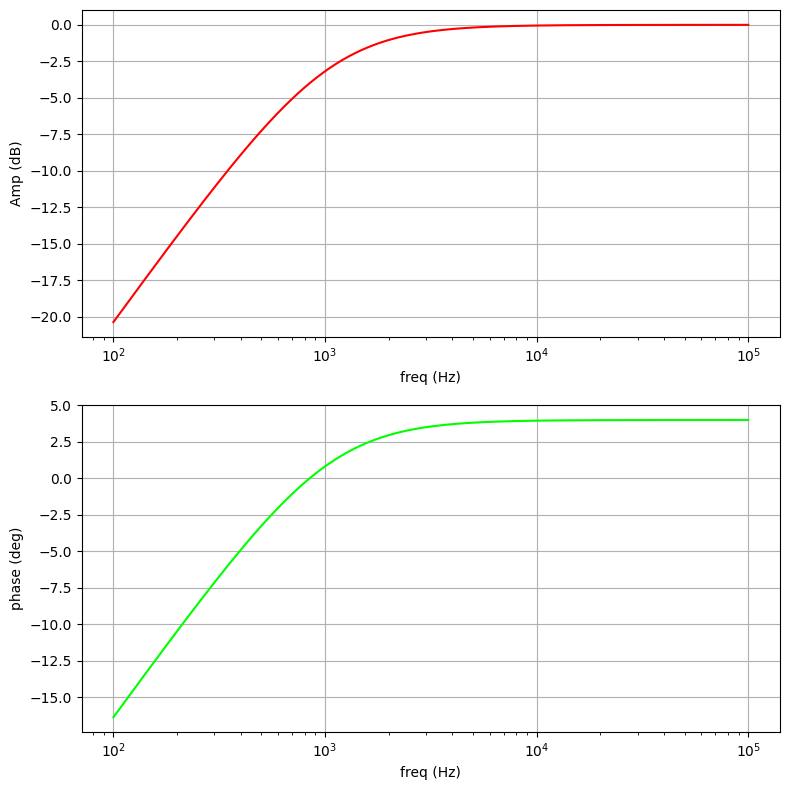

In [4]:
makePhasePlotSim(Filter.freq_sim, Filter.gain_sim, Filter.phase_sim)


Odpowiedź układu na sygnał prostokątny o częstotliwośi 0.1 fg

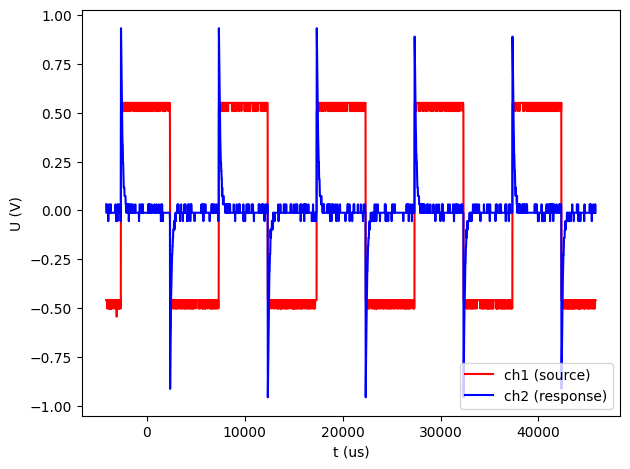

In [5]:
makeOscPlot(Filter.freq_01_sim.t1,Filter.freq_01_sim.ch1,Filter.freq_01_sim.t2,Filter.freq_01_sim.ch2 ,offset=740000)

Odpowiedź układu na sygnał prostokątny o częstotliwośi 10 fg

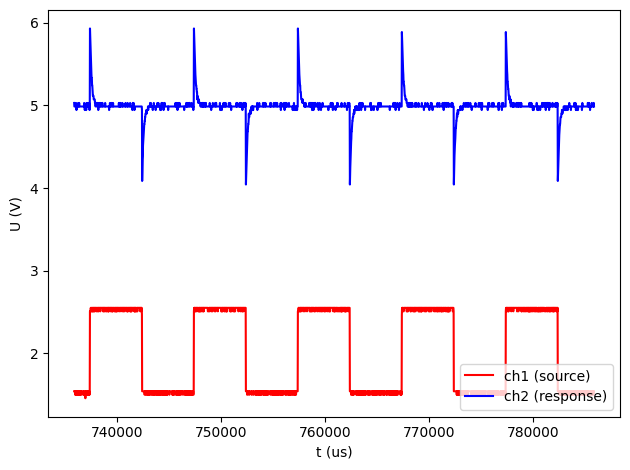

In [6]:
makeOscPlot(Filter.freq_10_sim.t1,Filter.freq_10_sim.ch1,Filter.freq_10_sim.t2,Filter.freq_10_sim.ch2 )

### Pomiar
Wykres charakterystyki fazowej i amplitudowej.

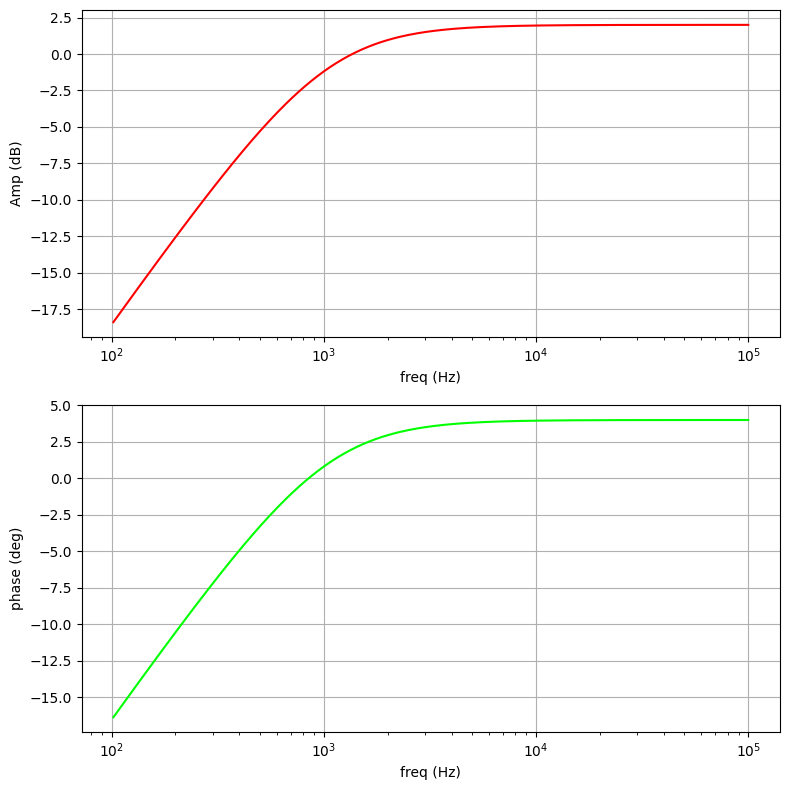

In [7]:
makePhasePlotSim(Filter.freq_data, Filter.gain_data, Filter.phase_data)

Odpowiedź układu na sygnał prostokątny o częstotliwośi 0.1 fg

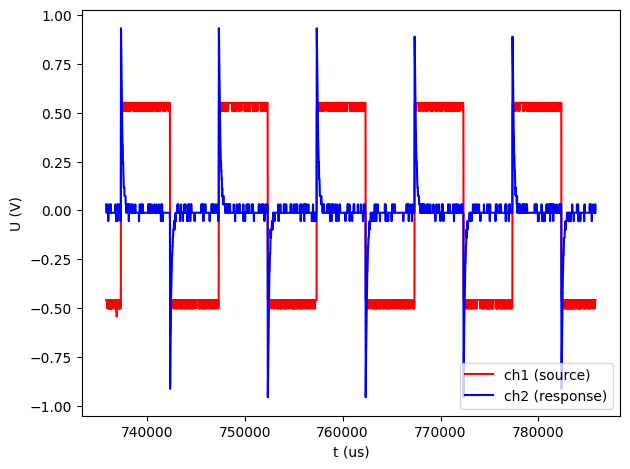

In [8]:
makeOscPlot(Filter.freq_01_data.t1,Filter.freq_01_data.ch1,Filter.freq_01_data.t2,Filter.freq_01_data.ch2 )

Odpowiedź układu na sygnał prostokątny o częstotliwośi 10 fg

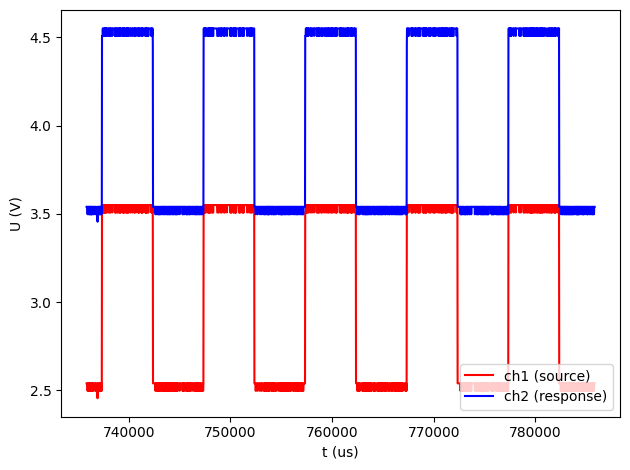

In [9]:
makeOscPlot(Filter.freq_10_data.t1,Filter.freq_10_data.ch1,Filter.freq_10_data.t2,Filter.freq_10_data.ch2 )

### <font color='red'>Czas narastania:<font>
Dla częstotliwości dziesięciokrotnie mniejszej od częstotliwości granicznej policzyć czas narastania:

In [10]:
t01 = 1
t09 = 0
t_narastania = t09-t01
print("czas narastania (symulacja): {0} {1}".format(t_narastania,"nazwa jednostki"))
t01 = 1
t09 = 0
t_narastania = t09-t01
print("czas narastania (dane): {0} {1}".format(t_narastania,"nazwa jednostki"))

czas narastania (symulacja): -1 nazwa jednostki
czas narastania (dane): -1 nazwa jednostki


### Porównania:
Porównanie symulacji z pomiarem charakterysytka fazowa i amplitudowa.

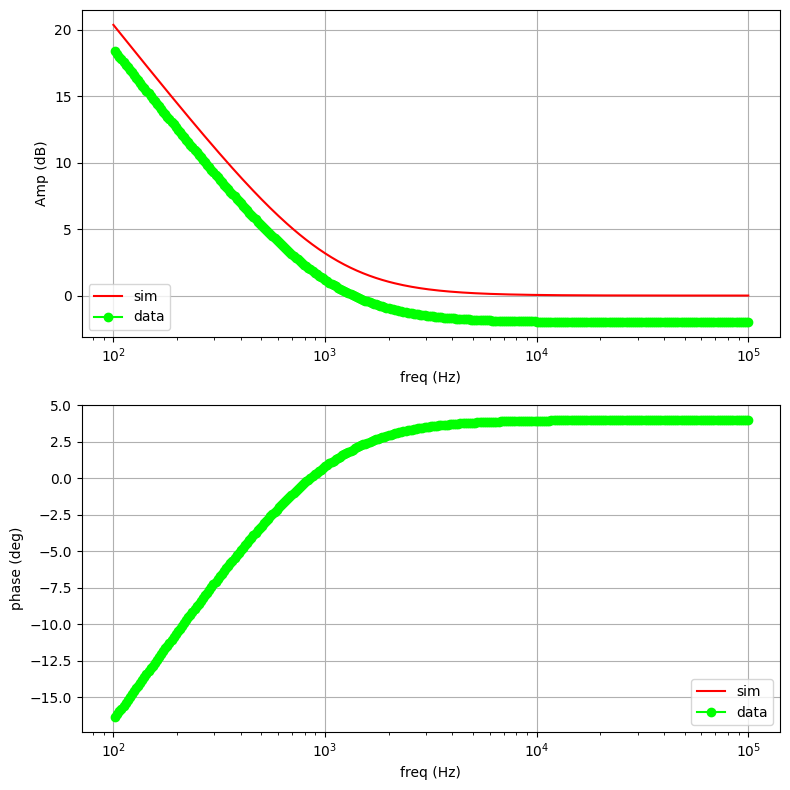

In [11]:
makePhasePlotSim2(Filter.freq_sim, Filter.gain_sim, Filter.phase_sim,Filter.freq_data, Filter.gain_data, Filter.phase_sim)

## Filtr górnoprzepustowy:

Dane:

In [12]:
# tutaj tworzymy wypełnione tablice np.


In [13]:
Filter =  filter_dataset()

# freq - czestotliwosci
# data - dane
# sim - symulacja
# gain - amplitudoa
# phase - faza
#freq_01 dane dla f = 0.1 fg
#freq_10 dane dla f = 10 fg

Filter.freq_sim = freq_sim
Filter.gain_sim = gain_sim
Filter.phase_sim = phase_sim

Filter.gain_data = gain_data
Filter.freq_data = freq_data
Filter.phase_data = phase_data

Filter.freq_01_sim.t1 = t1_01_sim 
Filter.freq_01_sim.t2 = t2_01_sim
Filter.freq_01_sim.ch1 = ch1_01_sim
Filter.freq_01_sim.ch2 = ch2_01_sim
Filter.freq_01_data.t1 = t1_01_data
Filter.freq_01_data.t2 = t2_01_data
Filter.freq_01_data.ch1 = ch1_01_data 
Filter.freq_01_data.ch2 = ch2_01_data

Filter.freq_10_sim.t1 = t1_10_sim
Filter.freq_10_sim.t2 = t2_10_sim
Filter.freq_10_sim.ch1 = ch1_10_sim
Filter.freq_10_sim.ch2 = ch2_10_sim
Filter.freq_10_data.t1 = t1_10_data
Filter.freq_10_data.t2 = t2_10_data
Filter.freq_10_data.ch1 = ch1_10_data 
Filter.freq_10_data.ch2 = ch2_10_data

### Symulacja
Wykres charektrystyki amplitudowej i fazowej:

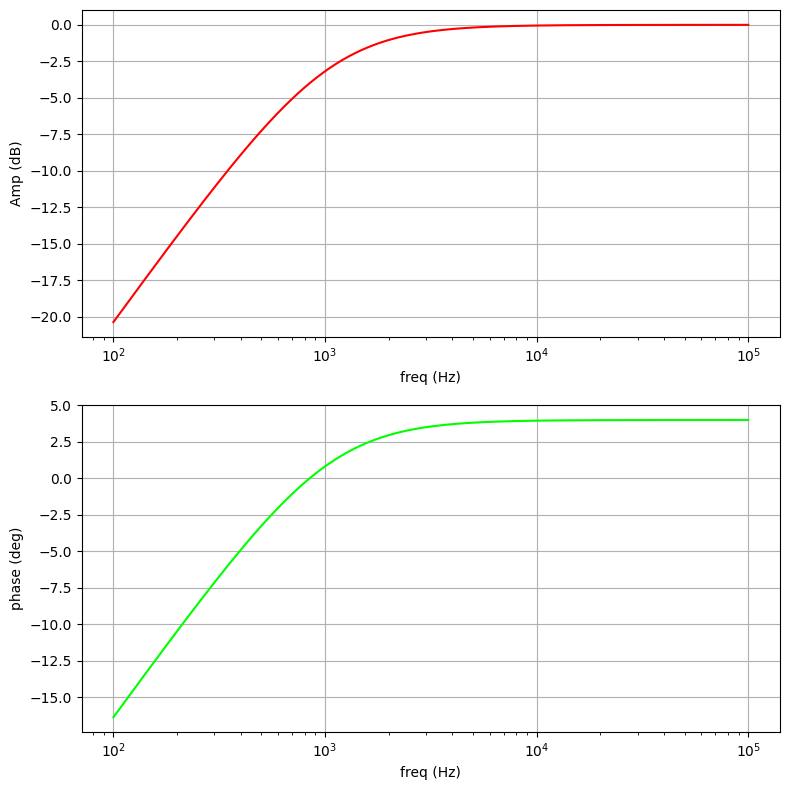

In [14]:
makePhasePlotSim(Filter.freq_sim, Filter.gain_sim, Filter.phase_sim)


Odpowiedź układu na sygnał prostokątny o częstotliwośi 0.1 fg

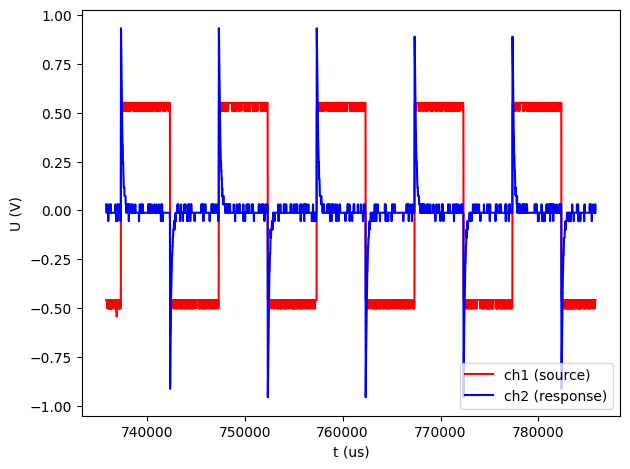

In [15]:
makeOscPlot(Filter.freq_01_sim.t1,Filter.freq_01_sim.ch1,Filter.freq_01_sim.t2,Filter.freq_01_sim.ch2 )

Odpowiedź układu na sygnał prostokątny o częstotliwośi 10 fg

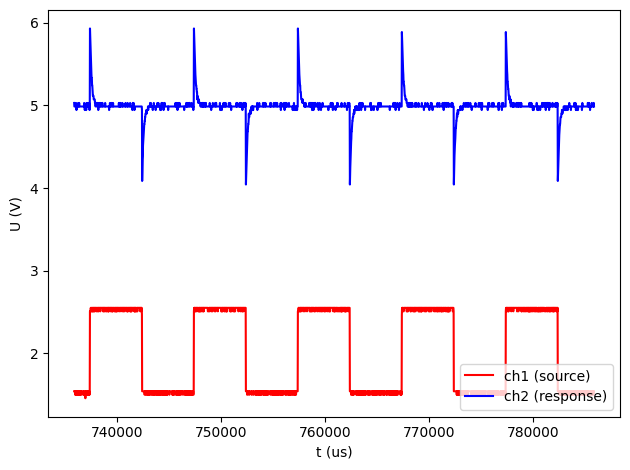

In [16]:
makeOscPlot(Filter.freq_10_sim.t1,Filter.freq_10_sim.ch1,Filter.freq_10_sim.t2,Filter.freq_10_sim.ch2 )

### Pomiar
Wykres charakterystyki fazowej i amplitudowej, wraz z zaznaczoną częstotliwością graniczną.

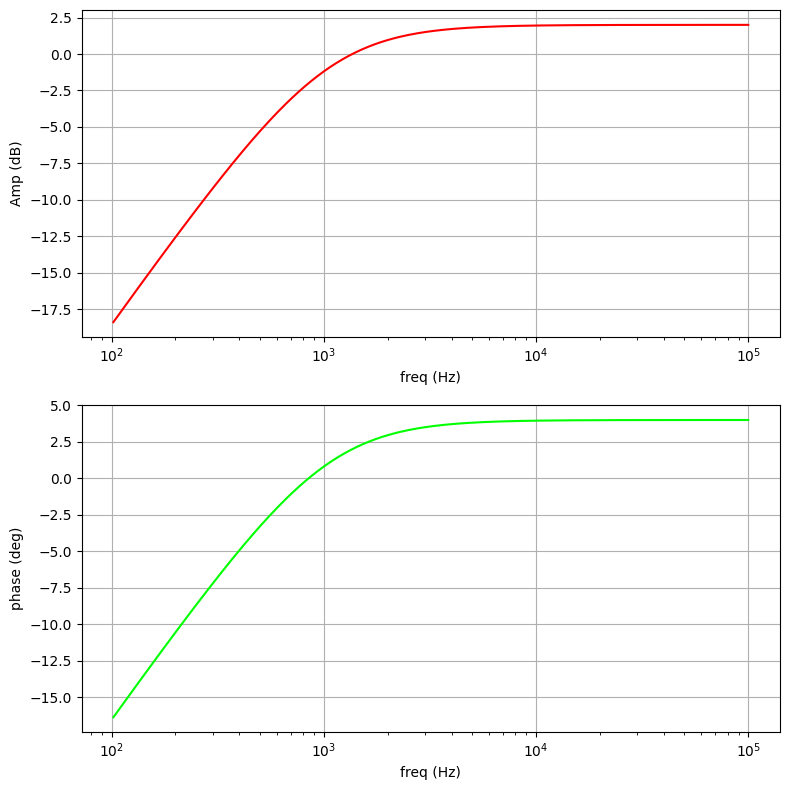

In [17]:
makePhasePlotSim(Filter.freq_data, Filter.gain_data, Filter.phase_data)

Odpowiedź układu na sygnał prostokątny o częstotliwośi 0.1 fg

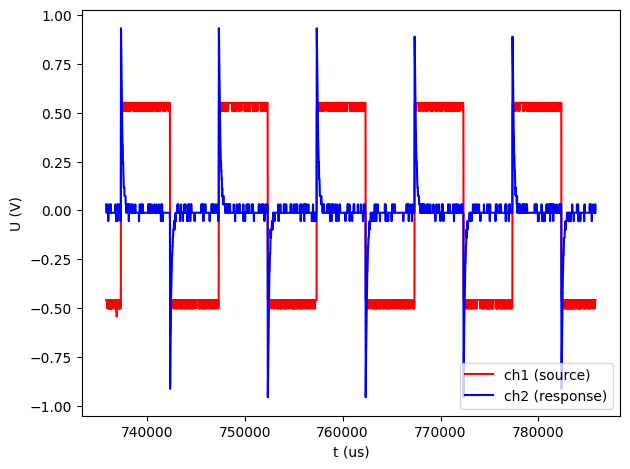

In [18]:
makeOscPlot(Filter.freq_01_data.t1,Filter.freq_01_data.ch1,Filter.freq_01_data.t2,Filter.freq_01_data.ch2 )

Odpowiedź układu na sygnał prostokątny o częstotliwośi 10 fg

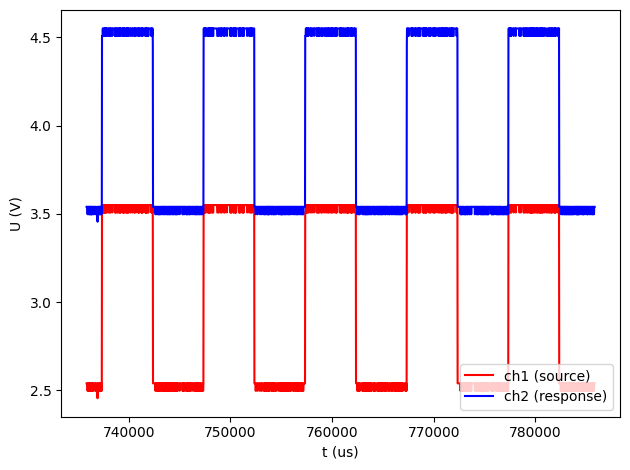

In [19]:
makeOscPlot(Filter.freq_10_data.t1,Filter.freq_10_data.ch1,Filter.freq_10_data.t2,Filter.freq_10_data.ch2 )

### <font color='red'>pomiary zwisu:</font>
Dokonać oszacowania zwisu dla częstotliwości 10 większej od fg.

In [20]:
U1 = 1
U2 = 1
z = (U1-U2)/U1
print("zwis (symulacja): {0} %".format(z*100.0))
U1 = 1
U2 = 1
z = (U1-U2)/U1
print("zwis (dane): {0} %".format(z*100.0))

zwis (symulacja): 0.0 %
zwis (dane): 0.0 %


### Porównania:
Porównanie symulacji z pomiarem charakterysytka fazowa i amplitudowa:

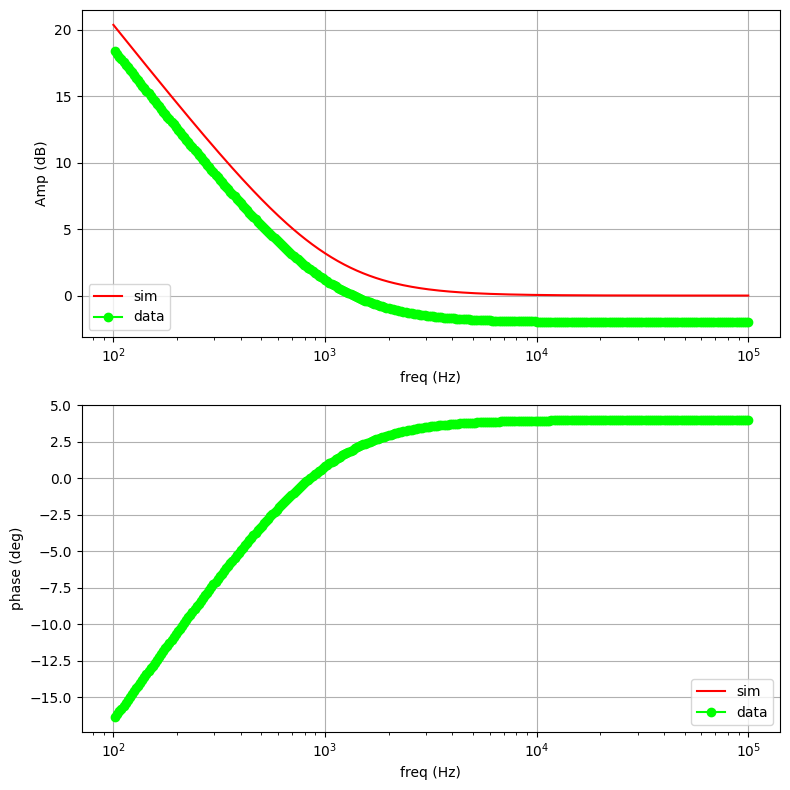

In [21]:
makePhasePlotSim2(Filter.freq_sim, Filter.gain_sim, Filter.phase_sim,Filter.freq_data, Filter.gain_data, Filter.phase_sim)

## Nieskompensowany dzielnik napięcia:

Dane:

In [22]:
Filter =  filter_dataset()


# freq - czestotliwosci
# data - dane
# sim - symulacja
# gain - amplitudoa
# phase - faza
#freq_01 dane dla f = 0.1 fg
#freq_10 dane dla f = 10 fg

Filter.freq_sim = freq_sim
Filter.gain_sim = gain_sim
Filter.phase_sim = phase_sim

Filter.gain_data = gain_data
Filter.freq_data = freq_data
Filter.phase_data = phase_data

Filter.freq_01_sim.t1 = t1_01_sim 
Filter.freq_01_sim.t2 = t2_01_sim
Filter.freq_01_sim.ch1 = ch1_01_sim
Filter.freq_01_sim.ch2 = ch2_01_sim
Filter.freq_01_data.t1 = t1_01_data
Filter.freq_01_data.t2 = t2_01_data
Filter.freq_01_data.ch1 = ch1_01_data 
Filter.freq_01_data.ch2 = ch2_01_data

Filter.freq_10_sim.t1 = t1_10_sim
Filter.freq_10_sim.t2 = t2_10_sim
Filter.freq_10_sim.ch1 = ch1_10_sim
Filter.freq_10_sim.ch2 = ch2_10_sim
Filter.freq_10_data.t1 = t1_10_data
Filter.freq_10_data.t2 = t2_10_data
Filter.freq_10_data.ch1 = ch1_10_data 
Filter.freq_10_data.ch2 = ch2_10_data

### Symulacja
Wykres charektrystyki amplitudowej i fazowej:

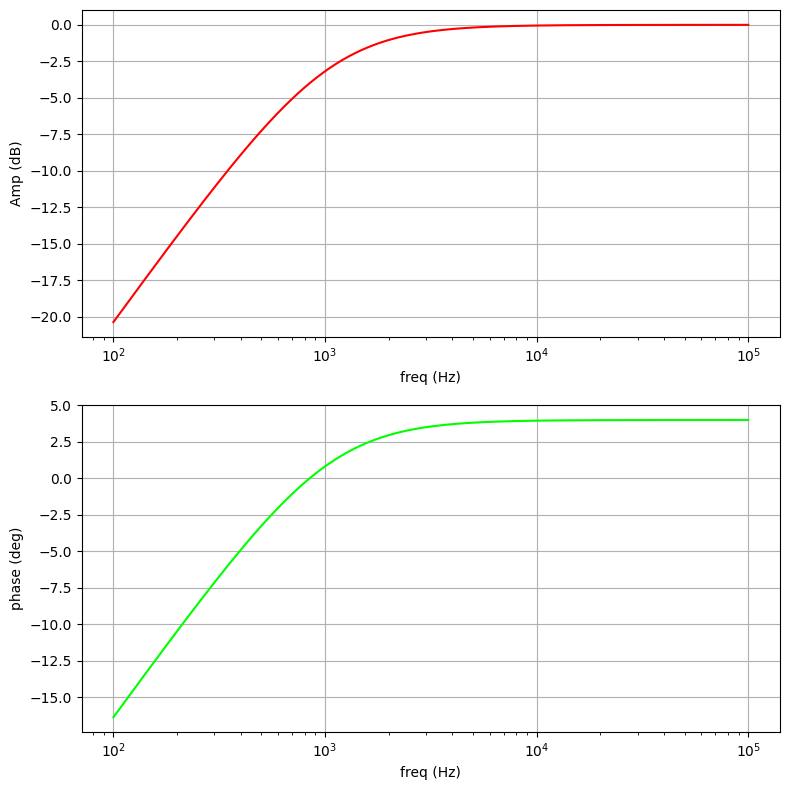

In [23]:
makePhasePlotSim(Filter.freq_sim, Filter.gain_sim, Filter.phase_sim)


Odpowiedź układu na sygnał prostokątny o częstotliwośi 0.1 fg

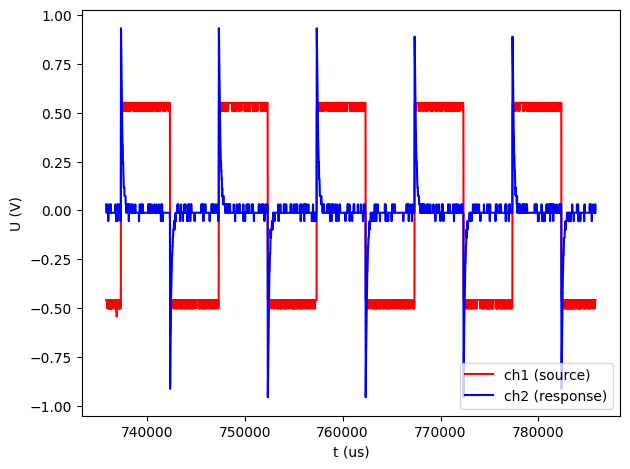

In [24]:
makeOscPlot(Filter.freq_01_sim.t1,Filter.freq_01_sim.ch1,Filter.freq_01_sim.t2,Filter.freq_01_sim.ch2 )

Odpowiedź układu na sygnał prostokątny o częstotliwośi 10 fg

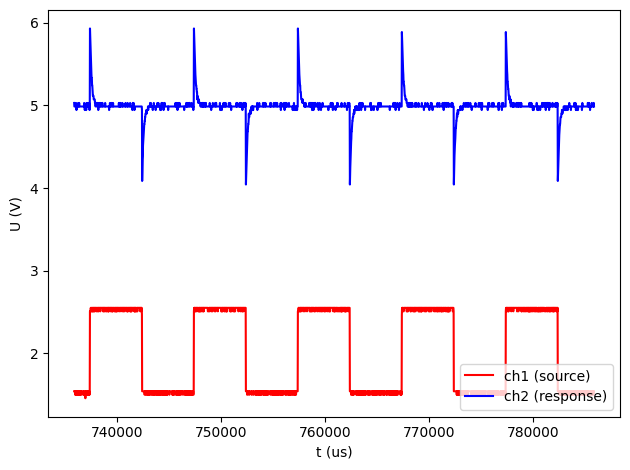

In [25]:
makeOscPlot(Filter.freq_10_sim.t1,Filter.freq_10_sim.ch1,Filter.freq_10_sim.t2,Filter.freq_10_sim.ch2 )

### Pomiar
Wykres charakterystyki fazowej i amplitudowej

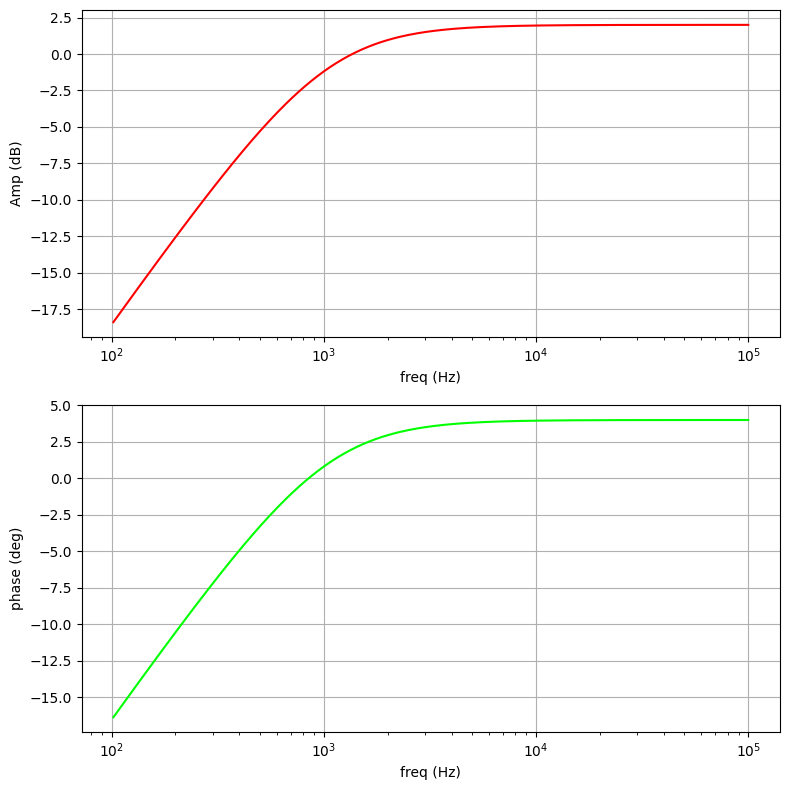

In [26]:
makePhasePlotSim(Filter.freq_data, Filter.gain_data, Filter.phase_data)

Odpowiedź układu na sygnał prostokątny o częstotliwośi 0.1 fg

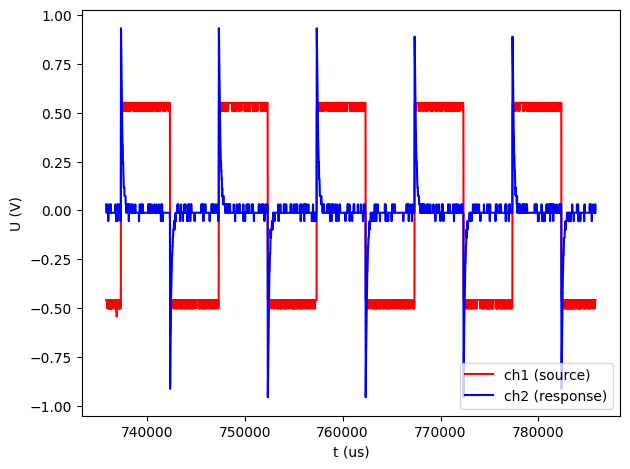

In [27]:
makeOscPlot(Filter.freq_01_data.t1,Filter.freq_01_data.ch1,Filter.freq_01_data.t2,Filter.freq_01_data.ch2 )

Odpowiedź układu na sygnał prostokątny o częstotliwośi 10 fg

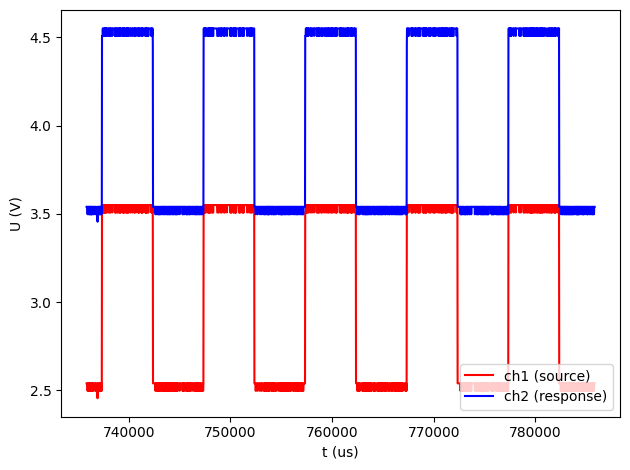

In [28]:
makeOscPlot(Filter.freq_10_data.t1,Filter.freq_10_data.ch1,Filter.freq_10_data.t2,Filter.freq_10_data.ch2 )

### Porównania:
Porównanie symulacji z pomiarem charakterysytka fazowa i amplitudowa:

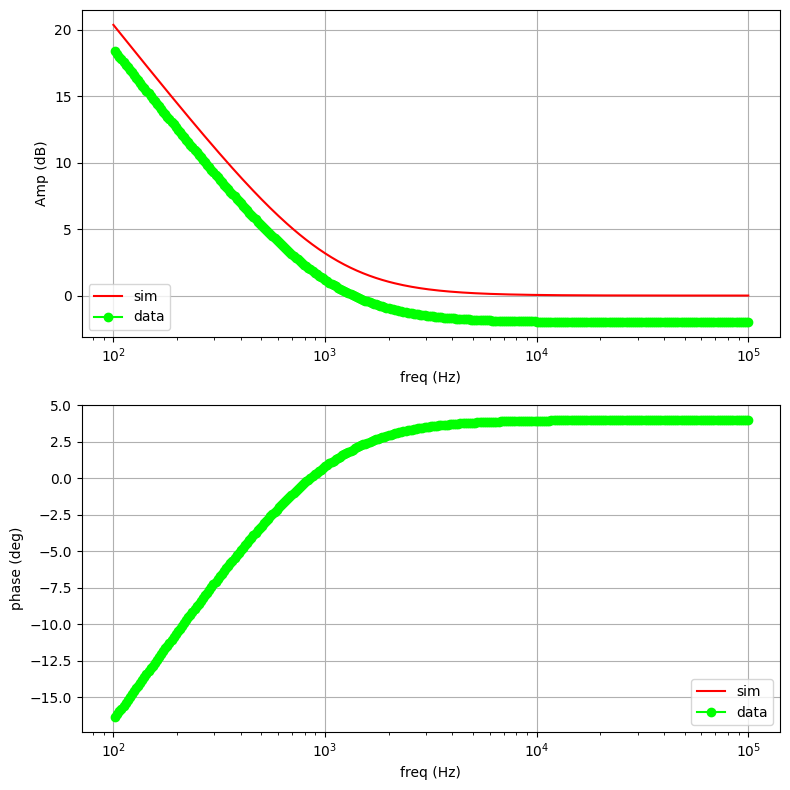

In [29]:
makePhasePlotSim2(Filter.freq_sim, Filter.gain_sim, Filter.phase_sim,Filter.freq_data, Filter.gain_data, Filter.phase_sim)

## Skompensowany dzielnik napięcia:

Dane:

In [30]:
Filter =  filter_dataset()

# freq - czestotliwosci
# data - dane
# sim - symulacja
# gain - amplitudoa
# phase - faza
#freq_01 dane dla f = 0.1 fg
#freq_10 dane dla f = 10 fg

Filter.freq_sim = freq_sim
Filter.gain_sim = gain_sim
Filter.phase_sim = phase_sim

Filter.gain_data = gain_data
Filter.freq_data = freq_data
Filter.phase_data = phase_data

Filter.freq_01_sim.t1 = t1_01_sim 
Filter.freq_01_sim.t2 = t2_01_sim
Filter.freq_01_sim.ch1 = ch1_01_sim
Filter.freq_01_sim.ch2 = ch2_01_sim
Filter.freq_01_data.t1 = t1_01_data
Filter.freq_01_data.t2 = t2_01_data
Filter.freq_01_data.ch1 = ch1_01_data 
Filter.freq_01_data.ch2 = ch2_01_data

Filter.freq_10_sim.t1 = t1_10_sim
Filter.freq_10_sim.t2 = t2_10_sim
Filter.freq_10_sim.ch1 = ch1_10_sim
Filter.freq_10_sim.ch2 = ch2_10_sim
Filter.freq_10_data.t1 = t1_10_data
Filter.freq_10_data.t2 = t2_10_data
Filter.freq_10_data.ch1 = ch1_10_data 
Filter.freq_10_data.ch2 = ch2_10_data

### Symulacja
Wykres charektrystyki amplitudowej i fazowej:

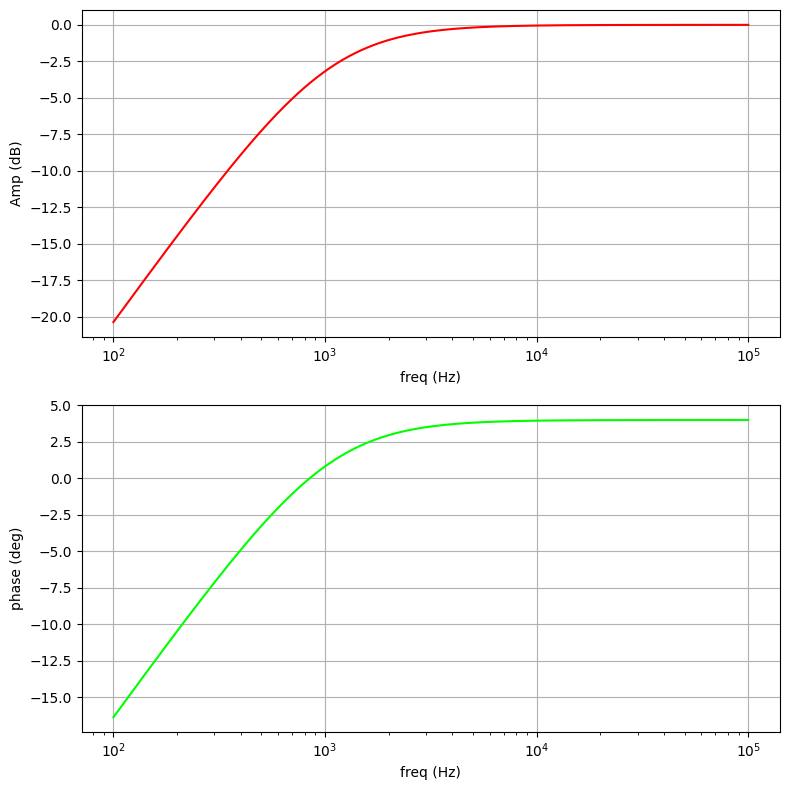

In [31]:
makePhasePlotSim(Filter.freq_sim, Filter.gain_sim, Filter.phase_sim)


Odpowiedź układu na sygnał prostokątny o częstotliwośi 0.1 fg

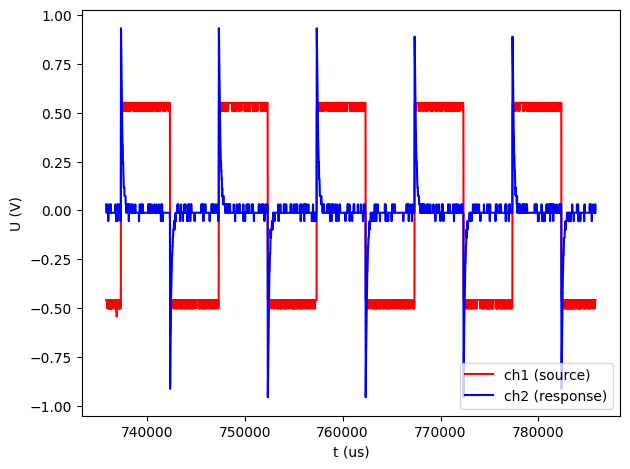

In [32]:
makeOscPlot(Filter.freq_01_sim.t1,Filter.freq_01_sim.ch1,Filter.freq_01_sim.t2,Filter.freq_01_sim.ch2 )

Odpowiedź układu na sygnał prostokątny o częstotliwośi 10 fg

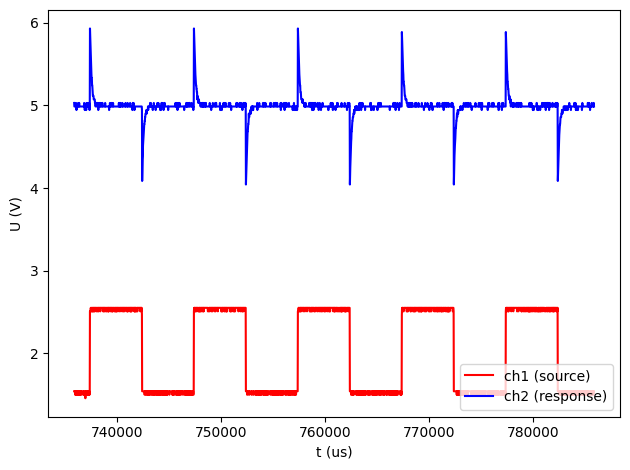

In [33]:
makeOscPlot(Filter.freq_10_sim.t1,Filter.freq_10_sim.ch1,Filter.freq_10_sim.t2,Filter.freq_10_sim.ch2 )

### Pomiar
Wykres charakterystyki fazowej i amplitudowej

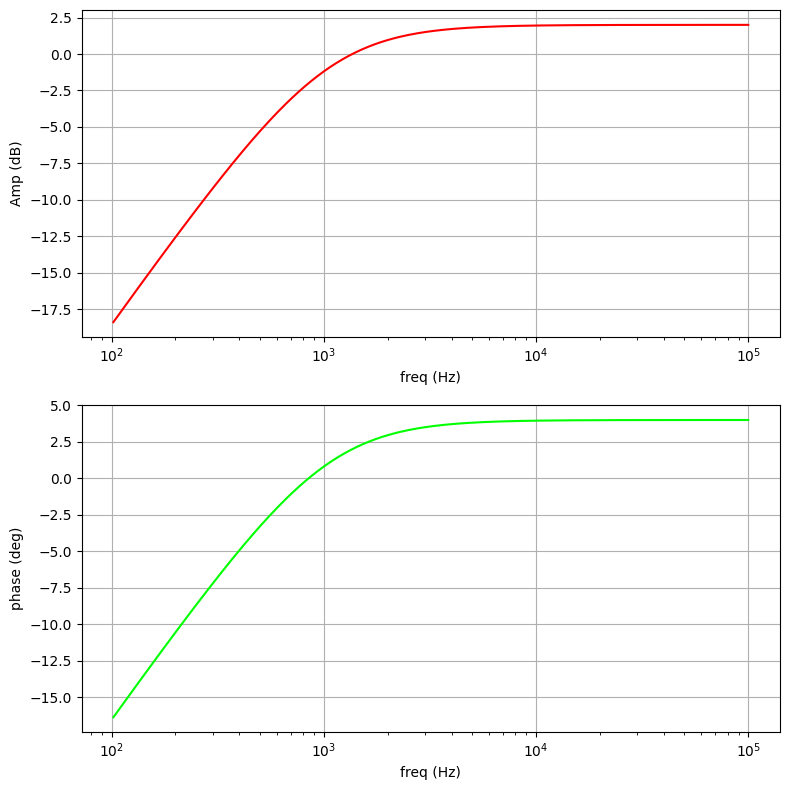

In [34]:
makePhasePlotSim(Filter.freq_data, Filter.gain_data, Filter.phase_data)

Odpowiedź układu na sygnał prostokątny o częstotliwośi 0.1 fg

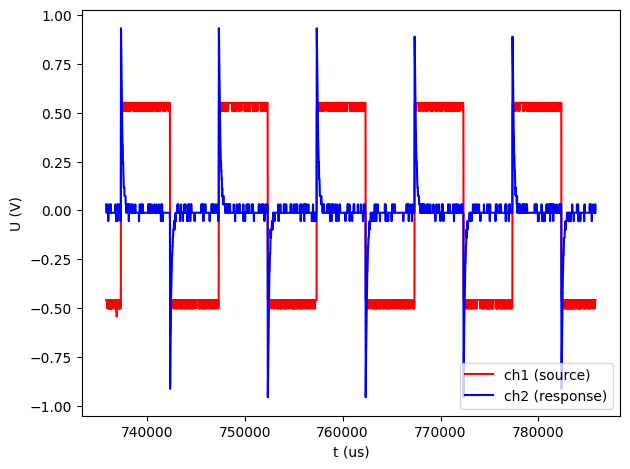

In [35]:
makeOscPlot(Filter.freq_01_data.t1,Filter.freq_01_data.ch1,Filter.freq_01_data.t2,Filter.freq_01_data.ch2 )

Odpowiedź układu na sygnał prostokątny o częstotliwośi 10 fg

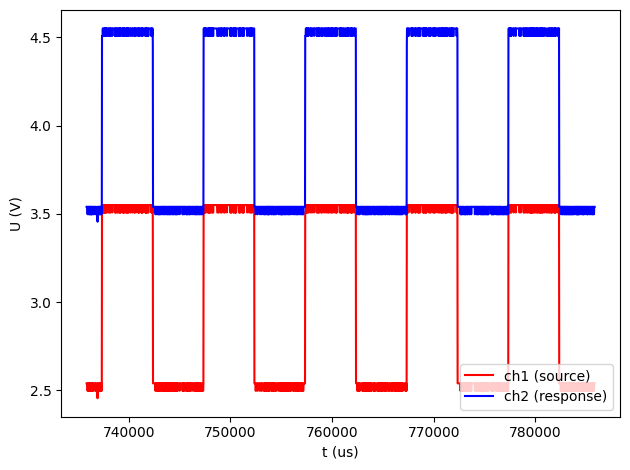

In [36]:
makeOscPlot(Filter.freq_10_data.t1,Filter.freq_10_data.ch1,Filter.freq_10_data.t2,Filter.freq_10_data.ch2 )

### Porównania:
Porównanie symulacji z pomiarem charakterysytka fazowa i amplitudowa:

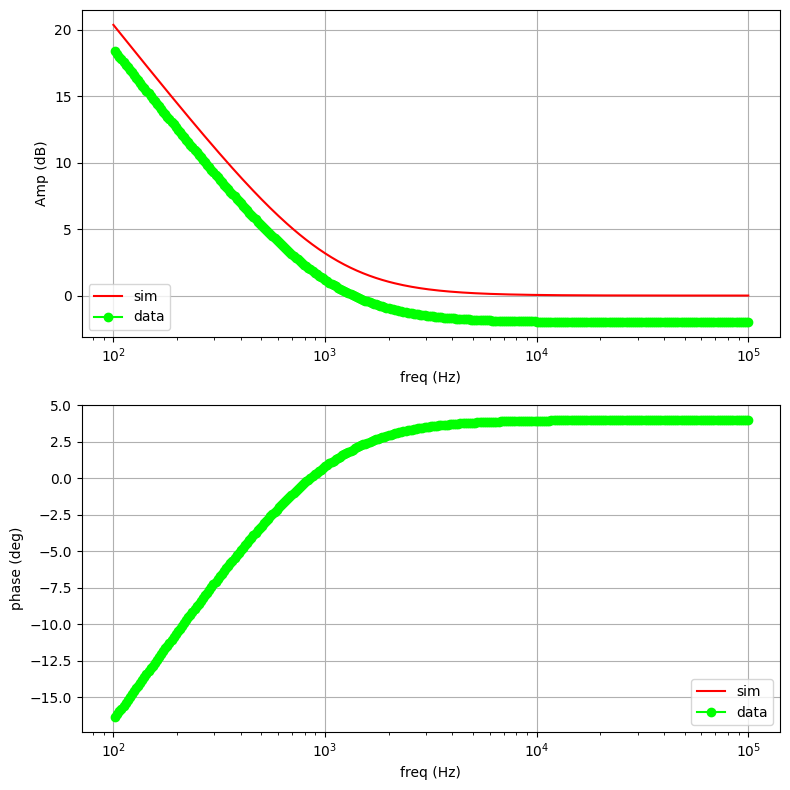

In [37]:
makePhasePlotSim2(Filter.freq_sim, Filter.gain_sim, Filter.phase_sim,Filter.freq_data, Filter.gain_data, Filter.phase_sim)

## Warunek na kompensacje dzielnika napięcia
(wyprowadzenie i pojemność kondensatora C2)

### jak używać latex'a w Python:
1. przełączyć komórkę w tryb "markdown" (tj. tekstowy)
2. wpisać kod latex'a między dolarami przykład:
$ E = mc^{2}$
Typy:
1. Znacznik dzielenia frac np. x przez y to \frac{x}{y}, indeks góry ^ np. e^{x} = $ e^{x} $indeks dolny _ np u_{w} = $ u_{w} $
2. Jest taka strona detexify (tam się rysuje znaczek i ona wypluwa kod latexowy)

Częstotliwości graniczne - rachunek niepewności + wyniki (dla filtrów + nieskomensowanego dzielnika napięcia):

Częstotliwości graniczne - porównanie wyników z symulacjami: